In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import json
import ROOT as r
from ReadKTOutputFile import *
from root_numpy import tree2array

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.13/02
        _                __     
  _____(_)________ _____/ /___ _
 / ___/ / ___/ __ `/ __  / __ `/
/ /__/ / /__/ /_/ / /_/ / /_/ / 
\___/_/\___/\__,_/\__,_/\__,_/  



2019-05-14T22:27:33[INFO    ] CicadaPy(50) -> All set!


In [2]:
%matplotlib notebook

In [3]:
def bayesian_efficiency(n, k):

    mean = (k+1)/(n+2)
    mode = k/n
    var = ((k+1)*(k+2))/((n+2)*(n+3))-(k+1)**2/(n+2)**2
    mode_errors = [mode - (mean-np.sqrt(var)), mean+np.sqrt(var) - mode]
    
    return mean, mode, np.sqrt(var), mode_errors


def LoadFilelist(mypath, search_str = '.'):
    '''
    Get list of all files fullfilling a few naming conditions
    '''
    filelist = []
    print('Searching files in {} with "{}" in filename'.format(mypath, search_str))
    for (dirpath, dirnames, filenames) in os.walk(mypath):
        for name in filenames:
            if '.root' in name and search_str in name:
                filelist.append(name)
    return filelist

def GetEventIdFromFilename(filename):
    splitted_name = filename.replace('.', '_')
    splitted_name = splitted_name.split('_')
    for s in splitted_name:
        #print(s)
        if s.isdigit():
            break
    return s

# get list of files

def get_path_list(paths, slopes):
    list = []
    for path in paths:
        for slope in slopes:
            list.append(path + str(slope))
    return list
def read_root(path_to_sim):
    f = r.TFile.Open(path_to_sim, 'read')
    
    tree=f.Get("Event_0")
    
    start_freq_true = tree2array(tree, branches=["StartFrequencies"])[0][0]
    
    return start_freq_true

In [4]:
#CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
list_of_directories = ['./SlopeScan_20190427/', './SlopeScan_20190502/']
#list_of_slopes = [0.1, 0.4, 0.7000000000000001, 1.0000000000000002]
list_of_slopes = [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                  0.7000000000000001, 0.8, 0.9, 1.0, 1.1]
path_list = get_path_list(list_of_directories, list_of_slopes)
TrackAndEventFileList = []
SimulatedEventFileList = []
k_index = []
start_frequencies = []
true_start_frequencies = []
simulated_slope = []
for path in path_list:
    #TrackandEventfile
    TrackAndEventFileList.append(sorted(LoadFilelist(path, 'reconstructed_event')))
    SimulatedEventFileList.append(sorted(LoadFilelist(path, 'simulated_event')))
#change concatenated files to something else

# check events are in files
    
for each_freq, each_path in zip(TrackAndEventFileList, path_list):
    k_id = []
    for i in range(len(each_freq)):
        try:
            start_times = ReadKTOutputFile(os.path.join(each_path, each_freq[i]), var='StartTimeInRunC')
            #print(start_times)
        except Exception as e:
            #print(e) # you ll probably get an error when no events are present in the file. if you 're sure that is the error, you can comment this line.
            continue

        file_id = int(GetEventIdFromFilename(each_freq[i]))
        if len(start_times) > 0:
            k_id.append(file_id)
    k_index.append(k_id)
    
    #load reconstructed events' start frequencies
    for each in each_freq:
        try:
            start_frequency = ReadKTOutputFile(os.path.join(each_path, each), var='StartFrequency')
            #print(start_frequency)
        except Exception as e:
            #print(e) #comment out after making sure the code works
            continue
        if len(start_frequency) != 0:
            start_frequencies.append(start_frequency)
            print(start_frequency)
        
    #load json file with simulated slopes
    slope_file = each_path + '/snr_and_power_and_slope.json'
    with open(slope_file) as infile:
        a = json.load(infile)
    simulated_slope.append(a['slope'])
    
reconstructed_freq = np.asarray(start_frequencies)
simulated_slope = np.asarray(np.round(simulated_slope, 1))
sub_event_ids = k_index

reconstructed_slope = []
for each_run, each_slope in zip(sub_event_ids, simulated_slope):
    for i in each_run:
        reconstructed_slope.append(np.round(each_slope[i], 1))
        
reconstructed_slope_arr = np.asarray(reconstructed_slope)

#load true start frequencies
for each, each_path in zip(SimulatedEventFileList, path_list):
    for i in range(len(each)):
        try:
            true_start_frequencies.append(read_root(os.path.join(each_path, each[i])))
            print(read_root(os.path.join(each_path, each[i])))
        except Exception as e:
            print(e)
            print(each_path+each[i])
            continue

Searching files in ./SlopeScan_20190427/0.1 with "reconstructed_event" in filename
Searching files in ./SlopeScan_20190427/0.1 with "simulated_event" in filename
Searching files in ./SlopeScan_20190427/0.2 with "reconstructed_event" in filename
Searching files in ./SlopeScan_20190427/0.2 with "simulated_event" in filename
Searching files in ./SlopeScan_20190427/0.30000000000000004 with "reconstructed_event" in filename
Searching files in ./SlopeScan_20190427/0.30000000000000004 with "simulated_event" in filename
Searching files in ./SlopeScan_20190427/0.4 with "reconstructed_event" in filename
Searching files in ./SlopeScan_20190427/0.4 with "simulated_event" in filename
Searching files in ./SlopeScan_20190427/0.5 with "reconstructed_event" in filename
Searching files in ./SlopeScan_20190427/0.5 with "simulated_event" in filename
Searching files in ./SlopeScan_20190427/0.6 with "reconstructed_event" in filename
Searching files in ./SlopeScan_20190427/0.6 with "simulated_event" in filen

[56192452.566964276]
[56325231.279645644]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56159861.98778974]
[56380704.972423434]
[56364960.722870894]
Error: no tree multiTrackEvents in file
[57553162.86670918]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56046854.78654593]
[56237087.67361111]
[56084550.206160575]
[59587771.95903853]
[56233484.604779]
[56053610.40900687]
[56321990.18429487]
[56395232.37179545]
[56361242.978000544]
[56024992.94178106]
[56430886.00852347]
[57293308.85826859]
[56467829.12694024]
[56115853.562751345]
[56357136.17852394]
Error: no tree multiTrackEvents in file
[56085629.54324098]
[56209019.252232835]
Error: no tree multiTrackEvents in file
[56204820.85853526]
[56101122.32366191]
[56245075.80773305]
[57672991.071428575]
[56372161.28505198]
[56070013.193701416]
[56162562.102126084]
[56231674.41819934]
[57772024.054276325]
[56450466.57985981]
[56428019.959808186]
Error: no tree multiTrackEven

[56495890.433279485]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56160684.624724545]
Error: no tree multiTrackEvents in file
[56067367.06149194]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56085085.40134886]
[57166612.41319507]
[56470448.21047602]
[56068838.75142477]
[56378173.82812592]
[56283181.051724456]
[56402587.890625]
[57016858.55263188]
[56037785.45673135]
Error: no tree multiTrackEvents in file
[56405362.21590908]
[56085854.16850318]
[56379627.04613201]
[56269938.151042186]
[56136109.65689391]
[56035970.052082]
[56237792.96875]
Error: no tree multiTrackEvents in file
[56270175.194607]
Error: no tree multiTrackEvents in file
[56101858.06191498]
Error: no tree multiTrackEvents in file
[56769089.47172513]
[56143730.13054654]
[56182376.922122814]
[57306586.37152777]
[56183679.10173533]
Error: no tree multiTrackEvents in file
[56306586.18249086]
[56380208.33333277]
[56036265.98011461]
[57381003.243583076]
[56

[56147022.736377634]
[56455738.56620493]
[56170493.53857633]
[56248715.04934115]
[56383448.29478924]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56270658.0528852]
[56429998.224431805]
[56043149.134155445]
[56259881.88244045]
[56229945.591517866]
[58040213.87924383]
[56221201.63203492]
[56359863.28124997]
[56439208.98437558]
[56379292.80599065]
[56045588.30240972]
[56318010.60267857]
[56017622.51420548]
[56367448.60707671]
[56256103.5156244]
Error: no tree multiTrackEvents in file
[56214839.57665575]
[56913606.07904108]
Error: no tree multiTrackEvents in file
[56293131.51041602]
[56206954.15296022]
Error: no tree multiTrackEvents in file
[56329345.703123644]
[56278084.35078983]
[56262051.52766719]
[56486002.60416665]
Error: no tree multiTrackEvents in file
[56262207.031249285]
[56382533.482144184]
[56034633.091517866]
[58188145.36986575]
[56181862.57102275]
[56261848.00091866]
[56154378.25520834]
[56089779.581621684]
[56362128.503543794]
[57855779.47

[56206198.29963282]
[56163668.71171661]
[56186985.18619682]
[56500635.00615764]
Error: no tree multiTrackEvents in file
[56605050.22321429]
[56164007.85733464]
[56374636.12161563]
[56270345.05208331]
[56342424.66517891]
[56057303.2924107]
[56066894.53124927]
Error: no tree multiTrackEvents in file
[56311967.313852556]
[56085680.58226747]
Error: no tree multiTrackEvents in file
[57473037.847951226]
[57207380.02232189]
[57502196.682950065]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56042480.46875001]
Error: no tree multiTrackEvents in file
[56440976.89924569]
[56472915.688502565]
[56383651.34214744]
[56258719.30803573]
Error: no tree multiTrackEvents in file
[56083431.742143475]
[57142440.13247349]
[56484026.22767907]
[56190382.43447652]
[56156412.760416664]
[56378482.231381856]
[56392267.40056818]
[57455008.370535694]
[56092744.71507401]
[56062011.71875038]
[56241073.21986024]
[56035407.899522044]
[56432032.3231456]
Error: no tree multiTrackEvents i

[56501464.84374998]
[56404622.39583332]
[56377766.927083306]
[56427094.35006161]
[56260932.56142889]
[56311877.02047415]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56184895.83333331]
[56488090.95939941]
[56901550.29296824]
[57041237.57102346]
[56102687.52110907]
Error: no tree multiTrackEvents in file
[56096174.4814239]
[56305803.57142853]
[56462751.11607074]
Error: no tree multiTrackEvents in file
[56257324.2187507]
[56414388.020832755]
[57497114.701704554]
Error: no tree multiTrackEvents in file
[56199137.36979164]
[57342263.92663109]
[56217447.91666752]
Error: no tree multiTrackEvents in file
[56282002.21706071]
Error: no tree multiTrackEvents in file
[56243341.6193189]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56505459.87215816]
[56429516.48389086]
[56047905.81597285]
Error: no tree multiTrackEvents in file
[56284641.5751689]
[56232927.91910892]
[56053873.69791665]
[56215122.76785713]
[57394845.14508993]
[

[56413574.218750685]
[57616086.866034865]
Error: no tree multiTrackEvents in file
[56183539.49652775]
[56257013.984806865]
[56288535.92218177]
Error: no tree multiTrackEvents in file
[56180826.822917916]
[56476722.687128715]
[56338400.36916256]
[58772053.00328562]
[56175614.680702984]
[56294759.11458243]
[56478207.23684183]
Error: no tree multiTrackEvents in file
[56186639.694941506]
[56316426.57268013]
[57371034.72699218]
[56183733.25892988]
[56048583.984375]
Error: no tree multiTrackEvents in file
[56476508.24652779]
Error: no tree multiTrackEvents in file
[56144205.72916611]
[56048179.19397272]
[56501464.843749985]
[57241984.86737108]
Error: no tree multiTrackEvents in file
[56429850.26041608]
[56295418.91999103]
[56022680.190853834]
[56182163.78348212]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56134478.84194835]
[57138788.13244048]
Error: no tree multiTrackEvents i

[56264548.10573586]
[56051548.54910717]
[56341433.3177643]
[57307344.32444855]
[56358191.08518935]
[56039968.58519152]
[56263538.70738633]
[57270608.0914297]
[56091308.59374997]
[56507432.72569445]
[56501560.58517159]
[56434733.07291669]
[56313778.98349254]
Error: no tree multiTrackEvents in file
[57984353.77037987]
[56108527.70276599]
[56270523.909684524]
[57355488.81635275]
[56405203.68303454]
Error: no tree multiTrackEvents in file
[56459499.04983107]
[56091977.47217464]
[56379766.049592406]
[57441569.010416955]
[56435239.56512178]
[57927246.09375003]
Error: no tree multiTrackEvents in file
[56444670.024670504]
[56152828.76364178]
[56417043.58552631]
[55982272.725709744]
[58216813.01968034]
[56449529.47443136]
[56496999.233583875]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56452511.51843005]
[56066894.53124933]
[57092285.156250924]
[56495496.96180491]
[56115722.65624997]
[56268059.71746623]
[56255834.19810

[56106938.44021404]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56484896.18664881]
[56998224.245047346]
Error: no tree multiTrackEvents in file
[56308976.99400412]
[56045334.06047079]
[56312699.21114289]
[56300571.9866067]
[56412179.12946428]
[56440789.969229706]
[56508225.66105769]
[56287067.492939875]
[56254069.010416664]
[59769290.47219271]
[56083984.37500038]
[56168038.50446428]
[56459263.39285716]
[56243896.48437561]
Error: no tree multiTrackEvents in file
[56234667.15806592]
[56414794.92187411]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56264532.18006051]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56038992.74553573]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56435546.87499993]
[56300116.901986696]
[56124485.129176974]
[56163890.9417229]
[56115815.250671

[56501570.99184782]
Error: no tree multiTrackEvents in file
[56388716.26420417]
[56359047.83179309]
[56386437.34288443]
[56392551.82074015]
[56263974.33075221]
[56637385.08330887]
[56110922.05120298]
Error: no tree multiTrackEvents in file
[56486816.406249985]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56473858.17307694]
Error: no tree multiTrackEvents in file
[56512150.998974934]
[56116832.38636368]
[56356672.80717351]
Error: no tree multiTrackEvents in file
[56339808.872767836]
[56244007.45738591]
[56047130.76636905]
[57098565.585371345]
[56211053.75744156]
Error: no tree multiTrackEvents in file
[56217447.916666605]
Error: no tree multiTrackEvents in file
[56074335.00744064]
[56220699.29233711]
[56227620.44270827]
[56070130.129894584]
[56337193.080357745]
[56192391.37883804]
[56215122.767857164]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56266878.22079832]
[56215533.08823527]
Error: no tree multiTrackEvents 

[56430982.50679319]
Error: no tree multiTrackEvents in file
[56059792.25852272]
[56479899.08854173]
[56218965.93964429]
[56243489.084985055]
Error: no tree multiTrackEvents in file
[56203673.880803235]
[56198802.618446305]
Error: no tree multiTrackEvents in file
[58029963.5150724]
[56202915.736607485]
[56407863.29106523]
[56375558.035713285]
[56153157.552083366]
Error: no tree multiTrackEvents in file
[56100221.66418653]
[56190708.70535721]
Error: no tree multiTrackEvents in file
[56413045.506567754]
Error: no tree multiTrackEvents in file
[56220301.37460446]
[56055939.50320568]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[57731359.145220995]
Error: no tree multiTrackEvents in file
[56478826.349432275]
[58266872.829860516]
Error: no tree multiTrackEvents in file
[56311759.65828279]
[56257847.37723208]
[56465366.908482164]
[56430076.097011164]
[56145019.531250276]
[56435546.875000566]
[56035199.08168954]
[57998357.11901161]
[56267438.61607148]
Error: 

[56286621.093750015]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56481933.59374957]
Error: no tree multiTrackEvents in file
[56197269.78637009]
Error: no tree multiTrackEvents in file
[57507324.218749344]
[56164550.78124941]
[56132541.23263888]
[56286621.09374946]
[56042480.46875]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56213378.90625135]
Error: no tree multiTrackEvents in file
[56335449.218749635]
[56433105.468750045]
[56091308.59374936]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56485883.91536531]
[56345858.184647836]
[56073037.42439578]
Error: no tree multiTrackEvents in file
[56262207.03125002]
[56066894.53125093]
[56134385.63778609]
Error: no tree multiTrackEvents in file
[56043207.1869639]
[56188964.84375025]
[56140136.71875003]
[56387195.734253846]
[56433105.46875006]
[56318819.87977111

[56479419.73137523]
[56115722.65625043]
[57406693.503087096]
Error: no tree multiTrackEvents in file
[56335449.218749985]
[56359863.281250514]
Error: no tree multiTrackEvents in file
[56370405.717329524]
[56066894.53125066]
[56042480.468750045]
[57434082.031250656]
[57629394.53125055]
[57217684.659091614]
[56286621.09375059]
[56750488.28124913]
[56359863.28125]
[56078069.04416783]
Error: no tree multiTrackEvents in file
[56115722.65625003]
[56234887.124078035]
[56808193.13449515]
[56359863.281250626]
[57416854.79234345]
[56231980.09672627]
[56115722.65624997]
[56876117.93386498]
[56359863.28124995]
[56275362.87514809]
[56359863.28124975]
Error: no tree multiTrackEvents in file
[56481933.59375004]
[56286621.09374999]
[56136271.1588542]
[56066894.531249695]
[56415818.737399176]
[56164550.78124927]
[56237792.96875087]
[56091308.59375005]
[56456821.98660679]
[56115722.656250514]
[56457519.53124997]
[56402723.52430497]
[56315789.473684475]
[56286621.09375006]
[56335449.21875002]
[56334003.4

[56110516.71645269]
[56464885.51589235]
[56112234.933034725]
Error: no tree multiTrackEvents in file
[56290761.49031438]
[57322645.471022315]
[57403407.9527249]
[56192720.853366375]
[56201957.12262456]
[56346102.62784093]
Error: no tree multiTrackEvents in file
[57511464.61531494]
[56171770.98018484]
[56143243.96306899]
Error: no tree multiTrackEvents in file
[56432088.21614529]
[57507672.99107185]
[56194104.646381594]
[56515415.73660711]
[57046564.27556899]
[56314034.89309919]
Error: no tree multiTrackEvents in file
[56314925.87673727]
[56353934.15178552]
[56252632.88909388]
[56067280.01644739]
[56488072.80244882]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56404146.79721323]
[56085205.0781255]
[56234823.69087784]
[56072998.046874955]
[56036667.596726194]
[56338936.94196424]
Error: no tree multiTrackEvents in file
[56134563.943613894]
[56442205.44717967]
Error: no tree multiTrackEvents in file
[56462048.03412201]
[56309501.11756347]
Error: no tree 

[56353759.76562491]
[56175944.01041661]
[57495534.01295773]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56097854.39311588]
[56307010.86023432]
[56441632.763143025]
[56485648.77717362]
[56507013.49431815]
[56380789.620534725]
Error: no tree multiTrackEvents in file
[56502859.933035806]
[57023183.36531405]
[56397356.305803545]
[56029588.460983925]
[56279962.713067554]
[56078369.14062529]
[56043985.44520497]
[56390555.24553602]
[56141967.773438]
[56408691.40624998]
[57333286.830357626]
Error: no tree multiTrackEvents in file
[56437710.2563386]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56333279.079861104]
[56448676.13584378]
[56226457.868303485]
[56033956.35111985]
[56258719.30803504]
[56378464.47172628]
[56065517.94418083]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56444011.75076904]
[56214738.16665948]
[57038225.44642911]
[56379582.33173122]
Error: no tree multiTrackEvents in

Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56146240.234373316]
[57269694.010417074]
[56108747.209821165]
[57853586.20252523]
[56505560.46860613]
[56056601.8132001]
[56101771.76339162]
[56964444.24715911]
Error: no tree multiTrackEvents in file
[56415026.25045554]
[56951070.975553475]
[56086990.507096216]
Error: no tree multiTrackEvents in file
[56032492.89772666]
[56280808.2217252]
[59881061.90966643]
[57016823.50852279]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56430461.0054999]
[56205887.675878115]
[56367710.658482805]
Error: no tree multiTrackEvents in file
[56258055.19276384]
[56432980.08088382]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56166770.24147666]
[56405639.648438096]
[56287866.709183685]
[56251884.989354394]
[56307547.433035806]
[57349298.65056896]
[56144816.08072922]
[56258212.002840884]
[56074884.5880677]
[56073869.97

[56476120.721726194]
[56410577.38965665]
Error: no tree multiTrackEvents in file
[56382649.73958381]
Error: no tree multiTrackEvents in file
[56629464.28571425]
[57582760.37267782]
[56495856.31773848]
[56478482.179445796]
[56038456.172734305]
[56260824.03374573]
[56474086.216517754]
[56277567.854768805]
[56322195.87053598]
[56501657.58634868]
[56235573.50852279]
[56261599.79372576]
[56246143.980313994]
[56451056.98529418]
[56341959.635416664]
[56318088.107639365]
[56097412.10937571]
[56125710.22727273]
[56206954.15296113]
[56323445.63802082]
[58136276.97172628]
[56351914.51671562]
[56221816.119025335]
[56424967.447917104]
[56163899.73958329]
Error: no tree multiTrackEvents in file
[56401478.21211253]
[56294045.253107004]
[56230671.184284136]
[56758626.30208235]
[56066300.2217377]
[57305221.3956343]
[56088780.27659812]
Error: no tree multiTrackEvents in file
[56418886.28949224]
[56122546.462538734]
[56553844.10511415]
Error: no tree multiTrackEvents in file
[56184624.565972276]
[5625349

Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56254338.63642202]
[56140737.06454916]
[56414467.55810496]
[56529822.71634576]
Error: no tree multiTrackEvents in file
[56309059.4517702]
[56185167.10069451]
[56103490.033739366]
[56357020.54794483]
Error: no tree multiTrackEvents in file
[56414061.11872343]
[56331380.20833346]
[56412290.91546516]
Error: no tree multiTrackEvents in file
[56161863.56788572]
[57117067.169997334]
[56232320.85129313]
[56469606.38826978]
[56509835.3794644]
[56158447.26562493]
[56267618.34402349]
[57438151.0416667]
[56367241.15728026]
[56876046.31696343]
[56189327.42883659]
[56405722.12837832]
[56386496.80397646]
[

[56293219.48902053]
Error: no tree multiTrackEvents in file
[56038992.74553628]
[56168796.705163024]
[56190708.7053571]
Error: no tree multiTrackEvents in file
[57875860.30506036]
[56232244.31818235]
[56186005.563447356]
[56062332.69037929]
[56307547.43303473]
[56119339.55439769]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56305803.571428604]
Error: no tree multiTrackEvents in file
[56208496.09375033]
[56195254.3161817]
[56290398.08310735]
Error: no tree multiTrackEvents in file
[56368480.009191155]
[56283748.851102434]
Error: no tree multiTrackEvents in file
[56164272.4862373]
Error: no tree multiTrackEvents in file
[56183416.19318123]
[56048152.967218086]
[56318644.73417208]
[56060008.51362181]
[56389508.92857201]
[56462176.28761569]
[56536574.59077282]
[56488909.040179715]
[56274528.57498836]
Error: no tree multiTrackEvents in file
[58408315.38789965]
[56389825.994318105]
Error: no tree multiTrackEvents in file
[56525376.26378682]
[56559455.93644

[61953613.28124991]
[56459738.991476655]
[57645629.88281226]
[56292006.548713624]
Error: no tree multiTrackEvents in file
[56091308.59375064]
[56128420.42242468]
[56067940.84821431]
[56311974.15865437]
[56320692.80005695]
[56551569.56817764]
[56262207.03124889]
[56433962.102521874]
[56280110.67708333]
Error: no tree multiTrackEvents in file
[56363351.00446333]
[56319037.05286549]
[56300477.72381753]
Error: no tree multiTrackEvents in file
[56288747.20550128]
Error: no tree multiTrackEvents in file
[56417061.94196485]
[56429776.27840843]
[57169057.20235819]
[56241280.691965364]
[59166802.30034676]
Error: no tree multiTrackEvents in file
[56459881.68115495]
[56263839.41897006]
Error: no tree multiTrackEvents in file
[56141764.3229177]
[56330355.15365985]
Error: no tree multiTrackEvents in file
[56231868.96829051]
[56511433.919271365]
[56088201.349431396]
[56930776.742788844]
[56105698.079361744]
[57796408.300241396]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents 

[58149549.69618002]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56437593.34788565]
[56361194.95738677]
[56360880.53385416]
Error: no tree multiTrackEvents in file
[56145121.73862023]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56538899.73958237]
Error: no tree multiTrackEvents in file
[56512451.17187389]
[56457519.5312492]
[56268093.425765835]
[60149539.97374876]
[56134522.88346201]
[57273356.1197916]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[57214854.88047217]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56377666.79496011]
[56329345.70312504]
Error: no tree multiTrackEvents in file
[56497918.105706975]
[56318184.47366602]
[56251356.33680563]
Error: no tree multiTrackEvents in file
[56203391.33522666]
[56503920.52722979]
Error: no tree multiTrackEvents in file
[56483561.19791606]
[57777210.58238638]
[56340066.85978424]
[56068929.37157729]


[56421332.61044468]
Error: no tree multiTrackEvents in file
[56472273.878669634]
[56170276.40566413]
[56360042.79641589]
[56082303.40676243]
[56550066.46566073]
[56688385.634114236]
[56238572.57746834]
[56412941.75554381]
Error: no tree multiTrackEvents in file
[57201355.7731323]
[56579589.84375014]
[57436794.70486169]
[56520803.35115038]
[56471965.475028865]
[56312681.13920841]
[56213378.90625045]
Error: no tree multiTrackEvents in file
[56181244.15731831]
Error: no tree multiTrackEvents in file
[56149841.21307646]
[60309307.391826496]
Error: no tree multiTrackEvents in file
[56072587.92922421]
[56107022.02418041]
[56266857.32886891]
[56347656.24999954]
[56335119.29898579]
Error: no tree multiTrackEvents in file
[56265694.75446428]
[56317342.12239614]
[56055094.401041165]
[56341727.120536305]
Error: no tree multiTrackEvents in file
[56363351.00446405]
[57733154.296874925]
[57439807.65566373]
[56476120.721725225]
[56286621.09374923]
[56330398.033404835]
[56267438.61607137]
[56082628.03

Error: no tree multiTrackEvents in file
[56217591.35117109]
[57266290.8380682]
[56357643.82102202]
[56123467.80711208]
Error: no tree multiTrackEvents in file
[56100729.87372208]
[56485262.78409102]
[56180245.5357131]
[57430308.948863715]
[56146220.8725978]
[56218261.71875]
[57489124.64488639]
[56152925.03720332]
[56382154.381793216]
[56217651.36718755]
[56413461.947860315]
[57337376.94925302]
[56188586.33115279]
Error: no tree multiTrackEvents in file
[56389508.92857077]
Error: no tree multiTrackEvents in file
[56532931.857638374]
Error: no tree multiTrackEvents in file
[56560526.808647275]
[56237792.96875007]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56363794.78717692]
[56079101.56250007]
[56352887.834821425]
[56424386.16071484]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56288812.09935862]
[56444440.569195345]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree mult

[60261552.412431315]
[56287318.63839247]
[56404440.74358303]
[56096406.035371326]
Error: no tree multiTrackEvents in file
[57505708.58226152]
[56134323.84672621]
[56322571.471496806]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[57045231.54002376]
[56484461.1955589]
[56112393.46590834]
[56184895.83333335]
[56406720.08443323]
Error: no tree multiTrackEvents in file
[56142525.050951086]
[56050574.73678315]
[56120031.02022019]
[56084798.17708334]
[57833426.33928571]
[56178792.317708336]
[56377156.57552082]
[56060791.015624985]
[56264532.180058435]
[56313360.30505846]
[56100782.97113183]
[56159568.31951486]
[56162073.99230131]
[56234781.90104196]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56061543.83977031]
[56163247.539480165]
Error: no tree multiTrackEvents in file
[56499837.239584]
[56497562.769243896]
[56320609.29840646]
[56079372.82986112]
[56111653.64583334]
Error: no tree

[56097338.64529599]
[56181989.397322156]
Error: no tree multiTrackEvents in file
[56052686.02247398]
[56256658.38068183]
Error: no tree multiTrackEvents in file
[56283978.87919416]
[56475275.21306744]
[56088627.19600474]
[57696823.84672618]
[56476968.0217161]
Error: no tree multiTrackEvents in file
[56476917.0055656]
[56140427.36235119]
[56260431.46306915]
Error: no tree multiTrackEvents in file
[56117350.26041533]
[56040306.61386931]
[56451416.01562441]
[56502131.57316767]
Error: no tree multiTrackEvents in file
[56448451.45089285]
[56382899.477789395]
[56234570.81840772]
[56453080.61079643]
[56892361.39575645]
[56283196.783685066]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56184453.05171253]
[56401514.93831051]
[57452683.22172513]
Error: no tree multiTrackEvents in file
[56431361.60714285]
[56110395.34252006]
[56330720.8034836]
[56283569.33593808]
[56947835.28645742]
[56260463.169643536]
[56474154.7193259]
[56404622.39583331]
Error: no tree multi

[56237792.96874963]
[56334709.39867384]
[56120697.476172216]
[56234202.66544076]
[56293596.5401786]
[56122381.0369311]
[56280517.57812553]
[56192566.91854576]
[56459263.39285713]
[56369879.30689159]
[57293731.04226142]
[57253494.75673565]
[56304059.70982107]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56232965.85373069]
[56049954.55638578]
[56178407.41131758]
[56435414.90709533]
[56328210.65597456]
[56245094.3706198]
[57408594.82314649]
[56087000.229778945]
[56195475.26041604]
[56464358.30347356]
[56263762.067078024]
[56258109.56621503]
[56104931.55810718]
[56236565.80687851]
[56082628.03819382]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56351412.259614766]
[56333124.06994045]
Error: no tree multiTrackEvents in file
[56476120.72172621]
[56397428.16823297]
[56341971.42066065]
[56139365.74835583]
[56353204.90056912]
Error: no tree multiTrackEvents in file
[56231689.453124985]
[56743683.49743425]
Error: no tree mul

[56018066.40625091]
[58400315.50480712]
[56016814.403044306]
[56258230.07989309]
Error: no tree multiTrackEvents in file
[56178060.53915589]
[56157226.56249942]
[56407349.974244066]
[56111052.03996542]
[56357723.40326195]
[57527340.71719721]
Error: no tree multiTrackEvents in file
[57678564.76413218]
Error: no tree multiTrackEvents in file
[56142014.72355767]
[56402033.025568925]
Error: no tree multiTrackEvents in file
[56236837.977810055]
[56481428.47521551]
[56383338.34134671]
[56159153.98848684]
[57387940.213969305]
[56457519.53124927]
[56165665.33627657]
[56060791.01562431]
[56191787.446923405]
Error: no tree multiTrackEvents in file
[56406150.26711985]
[56317918.31452295]
[56266874.425551966]
[57257027.52632997]
[56076882.102272]
[57938664.36298104]
[56440324.24470471]
[56089564.732142165]
[56358235.677083336]
[56204452.07663109]
[56162225.63243942]
[56304367.616119444]
[56336566.97100956]
[56134033.203124985]
[56220037.28693181]
[56327859.72749771]
Error: no tree multiTrackEvents

[56501982.082464516]
[58021846.93113772]
[57315569.546953954]
[56087736.79408249]
Error: no tree multiTrackEvents in file
[56189233.13015108]
[56287109.37500081]
Error: no tree multiTrackEvents in file
[56046395.74905055]
[56352810.32986109]
Error: no tree multiTrackEvents in file
[56068721.931138285]
[56169782.36607139]
[56448585.22657813]
[56460721.375512816]
[56187071.914234675]
[56224907.76909724]
[56388117.175047405]
Error: no tree multiTrackEvents in file
[56452094.1840278]
[56292237.14204536]
[56211751.30208335]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56276821.42045945]
[56487165.17857079]
[56307547.43303463]
[56109909.78422617]
[56061469.1840278]
[56169782.36607079]
[56284877.23214283]
[56022792.34921508]
[56465366.90848213]
[56451148.76109533]
[56453450.52083331]
[56123860.67708329]
Error: no tree multiTrackEvents in file
[56145685.36931818]
[56306596.235794514]
[57360021.68802692]
[56403142.75568112]
[56428222.656249106]
Error: no tree

Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56195666.74325939]
Error: no tree multiTrackEvents in file
[56973702.56696324]
[56168619.791666165]
[56427471.45432735]
[56358119.4196428]
[56401867.599961184]
[56046911.666531496]
Error: no tree multiTrackEvents in file
[56085204.1447227]
[56435296.47435843]
[56118734.78084365]
[56485913.733424716]
[56089394.24682079]
[56209581.16319385]
Error: no tree multiTrackEvents in file
[56110491.07142858]
[56170247.39583333]
[56207449.77678569]
Error: no tree multiTrackEvents in file
[56951032.36607009]
Error: no tree multiTrackEvents in file
[56455541.85579671]
[56443413.62847288]
[58589390.345980845]
[57013266.95884188]
[56093633.74255947]
[56303659.10684852]
[56091578.335300036]
[56258138.02083331]
[56389508.92857009]
[56461958.45170453]
[56144575.639205456]
[56080006.16776316]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree 

[57434306.15055026]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56059299.04513891]
[56346958.70535713]
Error: no tree multiTrackEvents in file
[57315528.99894063]
[59119524.27455356]
[56095342.471423656]
[56501205.775691055]
[56288946.24255844]
Error: no tree multiTrackEvents in file
[56335977.75902526]
[56171091.90742927]
[56475821.20415655]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56035359.70052024]
[56181931.84019614]
[56477193.56879675]
[56064569.38244156]
[57440836.588542216]
[56098632.81249999]
[56312023.24195855]
[57319183.349609375]
[56310557.385947436]
[56354050.40922615]
[56204501.06534137]
[56043506.26969603]
[56457339.896007106]
[56164610.03868274]
[56306152.343750015]
[56208093.207327135]
[56513569.03187957]
[56044224.330357194]
Error: no tree multiTrackEvents in file
[57910610.22013659]
[56061161.65369166]
[56413988.96156765]
[56112905.649038464]
Error: no 

[56376139.32291757]
[57434082.03125072]
[56506446.16699805]
[56206720.52556883]
Error: no tree multiTrackEvents in file
[56146240.23437561]
[56483893.21897025]
[56459844.68005952]
[56755138.578869045]
[56233446.77778725]
[57710232.20486049]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56328822.54464285]
[56512779.909915134]
[56048224.954043746]
[56213378.906250045]
[56064324.62993421]
Error: no tree multiTrackEvents in file
[57290504.09226192]
[56244028.59510322]
[56378464.47172624]
[56439208.984374985]
[56357386.49230075]
[56144002.87527493]
[56194776.21179657]
[56363071.60122417]
[56392267.40056892]
[58384697.21844746]
Error: no tree multiTrackEvents in file
[56061777.69057467]
[56283840.7090971]
[56325461.64772654]
[56152638.595036626]
[56254359.654017836]
[56239541.63438364]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree

Error: no tree multiTrackEvents in file
[56355766.916141644]
[56318625.02023932]
[56043812.14488687]
[56164226.126163706]
[56121826.17187502]
[56145222.981770866]
Error: no tree multiTrackEvents in file
[56418329.639856964]
[56498689.60832137]
[56338408.499053024]
Error: no tree multiTrackEvents in file
[57271490.7163154]
[56166802.563713595]
Error: no tree multiTrackEvents in file
[56094277.87162161]
[60932095.74326915]
[56434721.10523941]
[56263849.49184415]
[56121826.171875045]
[59996906.658464566]
[56158780.47315046]
[57120768.22916669]
[56049605.602870196]
[57728794.64285709]
[56249555.28090611]
Error: no tree multiTrackEvents in file
[57360554.29915968]
[56070988.815023296]
[56132609.04947969]
[57387912.83618643]
[56055769.9496548]
[56461118.20108737]
[56348237.53720142]
Error: no tree multiTrackEvents in file
[56454603.565939054]
[56228288.97548579]
[56313319.51297547]
[56087445.35710698]
[56233433.31473212]
[56068187.04044069]
[56421287.6242869]
[56018915.36732748]
[56195558.24

Error: no tree multiTrackEvents in file
[56486002.60416666]
[56483677.455355845]
[56117918.16546727]
[56243896.48437589]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file

[56384277.343750216]
[56262207.03124997]
[56282029.56659767]
[56164550.78125]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56262207.031250626]
[56530761.71875]
[56155327.69097159]
[56498522.00935518]
[56457519.53124936]
[56359863.28124997]
[56213378.906250075]
[56848144.53124973]
Error: no tree multiTrackEvents in file
[56237792.968750045]
[56091308.59374992]
Error: no tree multiTrackEvents in file
[56042480.468750075]
[56147054.036458895]
[56262207.031250544]
Error: no tree multiTrackEvents in file
[56481933.59374992]
Error: no tree multiTrackEvents in file
[56062042.28408639]
[56393453.33803708]
[56164550.78125005]
[56286621.093751006]
Error: no tree multiTrackEvents in file
[56272079.671339825]
[56164550.78125002]
[56140136.71874931]
[57260485.19736838]
Error: no tree multiTrackEvents in file
[56252873.13325094]
[56872558.59374978]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in fi

[56140136.718750484]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56433105.468749985]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56335449.21875005]
Error: no tree multiTrackEvents in file
[56048075.069572836]
[56988301.8357744]
[56091308.593750015]
[56403318.47166545]
Error: no tree multiTrackEvents in file
[56272738.58762251]
[56237792.968750626]
[56164550.781250656]
[56280887.23042673]
[56262207.03124999]
[56237792.96875062]
Error: no tree multiTrackEvents in file
[56337428.73733171]
[57458496.09375]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree mul

[56436157.22656296]
[57792244.37671706]
[56453450.5208334]
[57322414.037390955]
Error: no tree multiTrackEvents in file
[56284572.08027635]
[56165115.26824423]
[56158982.66173215]
[56383114.76934423]
[56337774.367558524]
[56402587.890625894]
[56476677.90740807]
[56268268.4536638]
[56118869.35763862]
[56529417.74374575]
[56136714.18662387]
[56389543.12193664]
[56384118.810876675]
Error: no tree multiTrackEvents in file
[56325426.603617914]
[56386602.492558524]
Error: no tree multiTrackEvents in file
[56357332.51459648]
[57196451.82291717]
[56236540.96554541]
[56088427.271305345]
[57526312.934027776]
[56117462.10511229]
[56196974.66288526]
[56273367.74553571]
[56334013.09742697]
[57146139.70588274]
[56166646.40893244]
[56207275.39062378]
Error: no tree multiTrackEvents in file
[56493901.271446474]
[56172583.1135011]
[56147418.10581057]
[56044470.19041655]
[57404033.954326965]
[59078534.10050678]
[56374104.817708395]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents 

[56480771.01934523]
Error: no tree multiTrackEvents in file
[56284877.2321423]
[56855466.3064579]
Error: no tree multiTrackEvents in file
[56406947.54464282]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56169983.76980633]
[56259438.426224224]
[56113614.47815142]
Error: no tree multiTrackEvents in file
[56378956.330128744]
[58359953.859112695]
[56289961.59138461]
[56174244.60018385]
[56039151.27840915]
[56225346.583946474]
Error: no tree multiTrackEvents in file
[57834666.76711106]
[56173270.08928482]
Error: no tree multiTrackEvents in file
[56240659.397140294]
[56318755.842681624]
[56157892.400567554]
[56475830.07812503]
[56059382.51201972]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56501908.73579543]
Error: no tree multiTrackEvents in file
[56500534.784225196]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in

[56425087.40031958]
[57583529.46717297]
[56369206.16274972]
[56109619.140624896]
[56050592.56052273]
[56498209.63541568]
[56391885.83583043]
[56263982.59943175]
[56120106.133513846]
[56246435.623527914]
[56337150.19851491]
[56241235.97756416]
[57451558.456799485]
[56298097.951755084]
[56307279.14663498]
[56159144.810268275]
[56380321.603430174]
Error: no tree multiTrackEvents in file
[57578241.257440574]
[57248370.19636923]
Error: no tree multiTrackEvents in file
[56394127.030733705]
[56069671.79232824]
[56558227.539062046]
[56435430.617558524]
[56290108.81696431]
[56230389.2623544]
[56476120.72172727]
[56550744.99267221]
[58277395.14802626]
[56082938.058036014]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[57465960.265724525]
[56507409.137228854]
[56280817.75102453]
[56281072.44318182]
[56121560.80163044]
[56365676.1532739]
[57481658.15304594]
Error: no tree multiTrackEvents in file
[56232127.508121334]
Error: 

Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
[56519601.004464366]
[56032781.63214585]
[56304059.709822]
[56392415.36458327]
[56178911.994485304]
[56179943.57520711]
Error: no tree multiTrackEvents in file
[56555175.781248726]
[56270345.05208421]
Error: no tree multiTrackEvents in file
[56179846.26312974]
[57388741.62946428]
[56367797.85156201]
Error: no tree multiTrackEvents in file
[56304523.722966164]
[57477484.80902777]
[56256103.51562504]
[56123370.3605572]
[56214488.63636431]
[56576102.1205349]
[56109101.89353814]
[56471202.13770613]
[56509835.379463315]
[56235027.62186452]
Error: no tree multiTrackEvents in file
[56536442.55323782]
Error: no tree multiTrackEvents in file
[56198265.438988194]
[56132776.596967414]
[56507457.38636431]
Error: no tree multiTrackEvents in file
[56044300.15042775]
Error: no tree multiTrackEvents in file
[56119210.37946418]
[56429617.74553571]
[56169245.79326957]
[56087820.87053571]
[56239536.83035702]
[56400553.3854167]
[56088470.736564994]
Error: no tree mu

Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


[56173256.0767379]
[59213839.53403084]
Error: no tree multiTrackEvents in file
[56336813.98000857]
Error: no tree multiTrackEvents in file
[56201870.49635625]
[56247975.56825878]
[56219482.421875656]
Error: no tree multiTrackEvents in file
[56072707.403272726]
[56976153.39949328]
[56280124.33454377]
[56232296.07465195]
Error: no tree multiTrackEvents in file
[56353424.40762372]
[56365966.79687336]
Error: no tree multiTrackEvents in file
[57557430.683945455]
[56345107.52918925]
[56133161.272321425]
Error: no tree multiTrackEvents in file
[56207118.890224874]
[56761532.738095]
[56511579.24107024]
[56220156.86663548]
[56387461.786684796]
[56304931.64062515]
[57440185.546874925]
[56459263.3928577]
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
[56327601.84151834]
[56108836.6386218]
Error: no tree multiTrackEvents in file
[56116248.49759635]
[56427694.10438139]
[56201623.98726808]
[56145019.5312504]
Error: no tree multiTrackEvents in file
[56488591.974432334

Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file
Error: no tree multiTrackEvents in file


Error: no tree multiTrackEvents in file
[56263643.15257391]
[56369016.67899121]
[56394299.958881125]
[56066894.53125078]
[56482377.48579615]
[56068710.453254186]
[56927199.59077286]
Error: no tree multiTrackEvents in file
[56456356.956845224]
[56074741.90848209]
[56389508.92857138]
[56277878.479709245]
[56279809.64684564]
Error: no tree multiTrackEvents in file
[56272379.5572909]
[56163494.702210724]
[56376255.580357]
[56456286.843662456]
[56355658.45606588]
[56056722.00520784]
[56127057.75669689]
[56292898.99553505]
[56120076.756568454]
[56464494.97767824]
[56115112.30468744]
[56207566.03422607]
[56286621.09375078]
[56078221.52071184]
[56346027.25352866]
[56409703.160191424]
[56306675.50223209]
[56384277.34375054]
[56193615.141368106]
[56142356.17897677]
[57731075.07726694]
Error: no tree multiTrackEvents in file
[57580400.0884811]
[56217817.8267045]
Error: no tree multiTrackEvents in file
[56051169.479174756]
Error: no tree multiTrackEvents in file
[56582579.32079043]
[56464190.81577

[2.59064053e+10]
[2.5906305e+10]
[2.59064556e+10 2.59073946e+10]
[2.59060939e+10]
[2.59063403e+10]
[2.59062317e+10]
[2.59064329e+10]
[2.59061717e+10]
[2.59060622e+10]
[2.59062019e+10]
[2.59062091e+10]
[2.59061864e+10 2.59073078e+10]
[2.59063354e+10]
[2.59061893e+10]
[2.59062766e+10 2.59080290e+10 2.59085926e+10]
[2.59060868e+10]
[2.59062302e+10]
[2.59064406e+10 2.59075883e+10]
[2.59060812e+10 2.59069749e+10]
[2.59062872e+10 2.59076391e+10]
[2.59061964e+10 2.59086667e+10 2.59092459e+10]
[2.59063574e+10]
[2.59064161e+10 2.59069955e+10 2.59076099e+10 2.59082573e+10
 2.59089781e+10]
[2.59061422e+10]
[2.59061779e+10]
[2.59060551e+10 2.59076129e+10 2.59081646e+10]
[2.59061408e+10]
[2.59062723e+10]
[2.59062115e+10]
[2.59060740e+10 2.59077492e+10 2.59083090e+10]
[2.59064413e+10]
[2.59063538e+10]
[2.59061926e+10 2.59070846e+10]
[2.59062073e+10]
[2.59060501e+10]
[2.59063836e+10]
[2.59064127e+10]
[2.59064236e+10]
[2.59062492e+10 2.59074134e+10]
[2.59060045e+10 2.59065861e+10 2.59072021e+10 2.5907

[2.59061134e+10]
[2.59062719e+10]
[2.59060052e+10]
[2.59060950e+10 2.59070686e+10]
[2.59062298e+10 2.59073741e+10]
[2.59064259e+10]
[2.59061823e+10 2.59067573e+10 2.59073687e+10 2.59080126e+10
 2.59087224e+10]
[2.59062373e+10]
[2.59062247e+10 2.59072861e+10]
[2.59061314e+10 2.59066835e+10 2.59072830e+10 2.59079142e+10]
[2.59061483e+10]
[2.59061705e+10 2.59067579e+10 2.59073782e+10 2.59080336e+10
 2.59087767e+10 2.59096481e+10 2.59107188e+10]
[2.59063162e+10]
[2.59060169e+10]
[2.59063519e+10]
[2.59064117e+10]
[2.59061108e+10]
[2.59062514e+10 2.59071506e+10]
[2.59062848e+10]
[2.59060891e+10 2.59071038e+10]
[2.59062110e+10 2.59067774e+10 2.59073836e+10 2.59080216e+10]
[2.59062373e+10]
[2.59063542e+10]
[2.59061844e+10]
[2.5906266e+10]
[2.59060059e+10]
[2.59063317e+10]
[2.59064311e+10]
[2.59060622e+10]
[2.59063965e+10]
[2.59060541e+10]
[2.59063811e+10 2.59069288e+10 2.59075267e+10 2.59081564e+10]
[2.59060633e+10 2.59073165e+10]
[2.59062054e+10 2.59076558e+10]
[2.59063757e+10]
[2.59061763e+1

[2.59064011e+10]
[2.59063543e+10 2.59075394e+10]
[2.5906252e+10]
[2.59062300e+10 2.59088971e+10 2.59094784e+10]
[2.59062971e+10]
[2.59064641e+10]
[2.59064507e+10 2.59077492e+10]
[2.59061123e+10 2.59079081e+10 2.59084734e+10]
[2.59061449e+10 2.59074602e+10]
[2.59064303e+10]
[2.59060105e+10 2.59068974e+10]
[2.59063813e+10 2.59077119e+10]
[2.59060388e+10]
[2.59062796e+10]
[2.5906178e+10]
[2.59064234e+10]
[2.59062073e+10]
[2.59063367e+10 2.59068836e+10 2.59074813e+10 2.59081107e+10]
[2.59060216e+10 2.59072284e+10]
[2.59062702e+10]
[2.59061187e+10]
[2.59062276e+10]
[2.5906307e+10]
[2.59062477e+10]
[2.59060601e+10 2.59072537e+10]
[2.59062573e+10]
[2.59060215e+10 2.59084552e+10 2.59090340e+10]
[2.59063409e+10 2.59077352e+10]
[2.59062300e+10 2.59075136e+10]
[2.59063054e+10]
[2.59061211e+10 2.59071740e+10]
[2.59060998e+10 2.59075056e+10]
[2.59064084e+10]
[2.59064835e+10 2.59076268e+10]
[2.59064465e+10 2.59078257e+10]
[2.59060577e+10]
[2.59064478e+10 2.59073326e+10]
[2.59062754e+10]
[2.5906449e+

[2.59062601e+10 2.59079650e+10 2.59085264e+10]
[2.59064068e+10 2.59069662e+10 2.59075688e+10 2.59082031e+10]
[2.59061901e+10 2.59071637e+10]
[2.59060156e+10 2.59065830e+10 2.59071897e+10 2.59078283e+10]
[2.59063226e+10]
[2.59061461e+10 2.59074320e+10]
[2.59063794e+10 2.59069585e+10 2.59075726e+10 2.59082198e+10
 2.59089397e+10]
[2.59062354e+10 2.59068099e+10 2.59074209e+10 2.59080643e+10
 2.59087728e+10]
[2.59061817e+10 2.59074357e+10]
[2.59064857e+10 2.59070521e+10 2.59076582e+10 2.59082962e+10]
[2.59060350e+10 2.59065866e+10 2.59071859e+10 2.59078169e+10]
[2.59060294e+10 2.59069256e+10]
[2.59061586e+10]
[2.59063051e+10]
[2.59064099e+10 2.59075140e+10]
[2.59061759e+10 2.59091049e+10 2.59096881e+10]
[2.59061951e+10]
[2.59063054e+10 2.59075153e+10]
[2.59064515e+10 2.59075828e+10]
[2.59061399e+10 2.59082803e+10 2.59088547e+10]
[2.59061745e+10 2.59083366e+10 2.59089115e+10]
[2.59062159e+10 2.59076547e+10]
[2.59061457e+10 2.59067026e+10 2.59073040e+10 2.59079371e+10]
[2.59060675e+10]
[2.59

[2.59063526e+10 2.59079035e+10 2.59084546e+10]
[2.59064016e+10]
[2.59061976e+10]
[2.59062570e+10 2.59068456e+10 2.59074670e+10 2.59081240e+10
 2.59088709e+10 2.59097473e+10 2.59108275e+10 2.59124906e+10]
[2.5906224e+10]
[2.59062789e+10 2.59068443e+10 2.59074500e+10 2.59080875e+10]
[2.59061632e+10]
[2.59060458e+10]
[2.59062269e+10]
[2.59061945e+10]
[2.59064871e+10]
[2.59063115e+10]
[2.59062624e+10]
[2.59062563e+10]
[2.59064726e+10]
[2.59063921e+10 2.59069645e+10 2.59075742e+10 2.59082161e+10
 2.59089199e+10]
[2.59064642e+10]
[2.59062801e+10]
[2.59060296e+10 2.59089205e+10 2.59095035e+10]
[2.59062961e+10]
[2.59062479e+10 2.59068317e+10 2.59074492e+10 2.59081008e+10
 2.59088333e+10 2.59096913e+10]
[2.59064285e+10]
[2.59063627e+10 2.59072733e+10]
[2.59061189e+10 2.59066973e+10 2.59073110e+10 2.59079575e+10
 2.59086757e+10]
[2.59061407e+10]
[2.59063144e+10]
[2.59060215e+10 2.59072179e+10]
[2.59061393e+10 2.59072123e+10]
[2.59060194e+10]
[2.59062544e+10 2.59073419e+10]
[2.59063511e+10 2.5908

[2.59064618e+10 2.59077117e+10]
[2.59063917e+10 2.59072792e+10]
[2.59063980e+10 2.59069740e+10 2.59075860e+10 2.59082305e+10
 2.59089427e+10]
[2.59064379e+10 2.59077490e+10]
[2.59061005e+10]
[2.5906029e+10]
[2.59060787e+10 2.59071370e+10]
[2.5906324e+10]
[2.59062075e+10]
[2.59064069e+10 2.59073661e+10]
[2.59062331e+10 2.59085465e+10 2.59091238e+10]
[2.59062404e+10]
[2.59062198e+10 2.59075590e+10]
[2.59064562e+10]
[2.59063183e+10]
[2.59062003e+10 2.59073099e+10]
[2.59062451e+10]
[2.59060266e+10 2.59072713e+10]
[2.59062972e+10]
[2.59063461e+10 2.59073769e+10]
[2.59063846e+10 2.59074794e+10]
[2.59062340e+10 2.59077553e+10 2.59083035e+10]
[2.59060739e+10 2.59079970e+10 2.59085665e+10]
[2.59064281e+10]
[2.59062256e+10 2.59073659e+10]
[2.59062284e+10 2.59088940e+10 2.59094752e+10]
[2.59064661e+10 2.59077978e+10]
[2.59064690e+10 2.59110522e+10 2.59116416e+10]
[2.59064358e+10 2.59077748e+10]
[2.59062658e+10]
[2.59063252e+10 2.59095144e+10 2.59100992e+10]
[2.59060042e+10]
[2.59060974e+10]
[2.59

[2.59060425e+10]
[2.59062396e+10 2.59074296e+10]
[2.59064279e+10]
[2.59062279e+10 2.59067849e+10 2.59073864e+10 2.59080196e+10]
[2.59060203e+10]
[2.59061926e+10 2.59067589e+10 2.59073651e+10 2.59080030e+10]
[2.59060562e+10]
[2.59062368e+10 2.59096731e+10 2.59102591e+10]
[2.59063679e+10]
[2.59063854e+10 2.59072519e+10]
[2.59061187e+10 2.59067037e+10 2.59073221e+10 2.59079749e+10
 2.59087109e+10 2.59095733e+10]
[2.59060478e+10]
[2.59063597e+10]
[2.59061679e+10]
[2.59062435e+10 2.59077850e+10 2.59083352e+10]
[2.59062708e+10 2.59077897e+10 2.59083376e+10]
[2.59062136e+10]
[2.59060069e+10 2.59078885e+10 2.59084568e+10]
[2.59063644e+10]
[2.59061057e+10]
[2.59061402e+10]
[2.59060107e+10]
[2.59062278e+10]
[2.59061033e+10]
[2.59060940e+10 2.59082455e+10 2.59088201e+10]
[2.59063117e+10]
[2.59062428e+10 2.59074899e+10]
[2.59060063e+10 2.59075045e+10 2.59080501e+10]
[2.59064628e+10]
[2.59060298e+10 2.59065618e+10 2.59071556e+10 2.59077815e+10]
[2.59060073e+10]
[2.590604e+10]
[2.59061868e+10 2.5907

[2.59060841e+10]
[2.59062679e+10]
[2.59064775e+10 2.59070439e+10 2.59076500e+10 2.59082880e+10]
[2.59060993e+10 2.59070477e+10]
[2.59064342e+10 2.59073064e+10]
[2.59064738e+10 2.59075306e+10]
[2.5906451e+10]
[2.59060484e+10 2.59069140e+10]
[2.59060653e+10 2.59069972e+10]
[2.59062860e+10 2.59068396e+10 2.59074397e+10 2.59080715e+10]
[2.59061749e+10 2.59087757e+10 2.59093563e+10]
[2.59064758e+10]
[2.59060669e+10 2.59073657e+10]
[2.59064788e+10 2.59076371e+10]
[2.59061558e+10]
[2.59064423e+10 2.59073383e+10]
[2.59061008e+10 2.59092448e+10 2.59098294e+10]
[2.59060610e+10 2.59075004e+10]
[2.59063292e+10]
[2.59063746e+10 2.59074326e+10]
[2.59063675e+10]
[2.59061695e+10]
[2.59062772e+10 2.59094077e+10 2.59099922e+10]
[2.59062746e+10 2.59074589e+10]
[2.59060226e+10 2.59078767e+10 2.59084441e+10]
[2.59064743e+10]
[2.59060981e+10]
[2.59064138e+10 2.59074391e+10]
[2.59064814e+10]
[2.59061322e+10 2.59076185e+10 2.59081625e+10]
[2.59063210e+10 2.59068813e+10 2.59074843e+10 2.59081190e+10]
[2.590604

[2.59063937e+10 2.59076644e+10]
[2.59063803e+10]
[2.59061791e+10 2.59071095e+10]
[2.59060325e+10]
[2.59062654e+10 2.59071912e+10]
[2.59060495e+10]
[2.59060913e+10]
[2.59061854e+10 2.59073212e+10]
[2.59063286e+10 2.59068795e+10 2.59074785e+10 2.59081093e+10]
[2.59062578e+10]
[2.59062913e+10]
[2.59062152e+10]
[2.59062170e+10 2.59072953e+10]
[2.59064771e+10]
[2.59060254e+10 2.59066144e+10 2.59072362e+10 2.59078936e+10
 2.59086418e+10 2.59095198e+10 2.59106032e+10 2.59122801e+10
 2.59128402e+10]
[2.59061601e+10]
[2.5906196e+10]
[2.59064863e+10 2.59073700e+10]
[2.59064433e+10]
[2.59061467e+10 2.59086273e+10 2.59092066e+10]
[2.59063962e+10 2.59069849e+10 2.59076063e+10 2.59082632e+10
 2.59090102e+10 2.59098866e+10 2.59109669e+10 2.59126304e+10]
[2.590616e+10]
[2.59062934e+10]
[2.59062473e+10]
[2.59061681e+10 2.59070736e+10]
[2.59061717e+10]
[2.59062712e+10 2.59071896e+10]
[2.59060123e+10 2.59069092e+10]
[2.59061683e+10]
[2.59060632e+10]
[2.59063487e+10]
[2.59061524e+10]
[2.59063079e+10]
[2.5

[2.59061628e+10 2.59067299e+10 2.59073366e+10 2.59079750e+10]
[2.59061938e+10 2.59075544e+10]
[2.59061574e+10]
[2.59060538e+10]
[2.59061837e+10 2.59067232e+10 2.59073188e+10 2.59079462e+10]
[2.59060457e+10 2.59066273e+10 2.59072433e+10 2.59078928e+10
 2.59086196e+10 2.59094706e+10]
[2.59060031e+10 2.59065715e+10 2.59071787e+10 2.59078179e+10]
[2.59061235e+10]
[2.59063278e+10 2.59073696e+10]
[2.59060945e+10]
[2.59061352e+10]
[2.59062157e+10]
[2.59060377e+10 2.59066234e+10 2.59072425e+10 2.59078961e+10
 2.59086344e+10 2.59094998e+10]
[2.59063943e+10 2.59107162e+10 2.59113051e+10]
[2.59060696e+10]
[2.5906361e+10]
[2.59060125e+10]
[2.59061355e+10 2.59082740e+10 2.59088485e+10]
[2.59060793e+10]
[2.59063116e+10 2.59072015e+10]
[2.59062163e+10]
[2.59063291e+10 2.59068999e+10 2.59075087e+10 2.59081495e+10]
[2.5906306e+10]
[2.59063212e+10]
[2.59063003e+10]
[2.59061902e+10 2.59071423e+10]
[2.59060415e+10]
[2.59064484e+10 2.59074268e+10]
[2.59064794e+10]
[2.59060862e+10]
[2.59062487e+10]
[2.59060

[2.59063302e+10 2.59111578e+10 2.59117478e+10]
[2.59061551e+10]
[2.59062376e+10 2.59073128e+10]
[2.59060745e+10 2.59070970e+10]
[2.59064535e+10]
[2.59060012e+10 2.59069107e+10]
[2.59062141e+10 2.59072454e+10]
[2.59061945e+10 2.59087907e+10 2.59093712e+10]
[2.59062650e+10 2.59067950e+10 2.59073885e+10]
[2.59064325e+10 2.59069940e+10 2.59075976e+10 2.59082330e+10]
[2.59060583e+10]
[2.5906161e+10 2.5907172e+10]
[2.59062237e+10 2.59072156e+10]
[2.5906263e+10 2.5907408e+10]
[2.59062984e+10 2.59073123e+10]
[2.59061619e+10 2.59070774e+10]
[2.59062474e+10]
[2.59060277e+10 2.59065734e+10 2.59071707e+10 2.59077997e+10]
[2.59060017e+10 2.59069794e+10]
[2.59061089e+10]
[2.59060183e+10]
[2.5906077e+10]
[2.59064320e+10 2.59068790e+10 2.59074689e+10]
[2.59060561e+10]
[2.59062442e+10]
[2.59062068e+10 2.59076732e+10]
[2.59062132e+10 2.59072051e+10]
[2.59061769e+10 2.59074538e+10]
[2.59061702e+10 2.59072923e+10]
[2.59060404e+10]
[2.59064626e+10 2.59076678e+10]
[2.59063454e+10]
[2.59061464e+10 2.59067169

[2.59060708e+10]
[2.59061294e+10]
[2.59060294e+10 2.59066093e+10 2.59072240e+10 2.59078718e+10
 2.59085938e+10]
[2.59060428e+10]
[2.59060051e+10 2.59065782e+10 2.59071883e+10 2.59078307e+10
 2.59085361e+10]
[2.59063818e+10 2.59087923e+10 2.59093709e+10]
[2.59061674e+10]
[2.5906471e+10]
[2.59064224e+10]
[2.59060328e+10 2.59071618e+10]
[2.59063762e+10 2.59073308e+10]
[2.59061538e+10 2.59089262e+10 2.59095083e+10]
[2.59060404e+10]
[2.59060050e+10 2.59065946e+10 2.59072168e+10 2.59078749e+10
 2.59086249e+10 2.59095052e+10 2.59105930e+10 2.59122893e+10
 2.59128505e+10 2.59134541e+10]
[2.59062041e+10 2.59071708e+10]
[2.59064721e+10]
[2.59063785e+10 2.59069226e+10 2.59075194e+10 2.59081480e+10]
[2.59064527e+10 2.59102113e+10 2.59107986e+10]
[2.59062928e+10 2.59068134e+10 2.59074055e+10]
[2.59064585e+10]
[2.59064880e+10 2.59070686e+10 2.59076838e+10 2.59083324e+10
 2.59090564e+10]
[2.59062182e+10]
[2.59062781e+10 2.59083496e+10 2.59089227e+10]
[2.59064527e+10]
[2.59060986e+10 2.59075098e+10]
[

[2.59061482e+10]
[2.59061480e+10 2.59073146e+10]
[2.59064208e+10 2.59077331e+10]
[2.59060550e+10 2.59072104e+10]
[2.59064570e+10 2.59070348e+10 2.59076481e+10 2.59082942e+10
 2.59090110e+10]
[2.59064261e+10 2.59075601e+10]
[2.59063994e+10]
[2.59063469e+10 2.59068788e+10 2.59074726e+10 2.59080985e+10]
[2.59064148e+10]
[2.59061372e+10 2.59073032e+10]
[2.59064361e+10]
[2.59061608e+10]
[2.59060929e+10 2.59073346e+10]
[2.59063372e+10 2.59075388e+10]
[2.59061412e+10 2.59070262e+10]
[2.59063219e+10 2.59076432e+10]
[2.59062389e+10]
[2.59060362e+10]
[2.59064187e+10]
[2.59061036e+10]
[2.590647e+10]
[2.59060207e+10]
[2.59062744e+10]
[2.59060607e+10]
[2.59061227e+10 2.59066812e+10 2.59072835e+10 2.59079174e+10]
[2.59064196e+10 2.59080294e+10 2.59085852e+10]
[2.59064569e+10 2.59075983e+10]
[2.5906353e+10]
[2.59064255e+10 2.59087442e+10 2.59093215e+10]
[2.59061536e+10]
[2.59060849e+10]
[2.59062229e+10]
[2.59063139e+10 2.59074408e+10]
[2.59062814e+10 2.59087625e+10 2.59093419e+10]
[2.59060223e+10]
[2

[2.59064788e+10 2.59070579e+10 2.59076720e+10 2.59083191e+10
 2.59090390e+10]
[2.59062765e+10 2.59084280e+10 2.59090027e+10]
[2.59064346e+10 2.59069371e+10 2.59075278e+10]
[2.59064048e+10]
[2.59060023e+10 2.59065744e+10 2.59071840e+10 2.59078257e+10
 2.59085291e+10]
[2.59064627e+10 2.59070345e+10 2.59076438e+10 2.59082853e+10
 2.59089877e+10]
[2.59061315e+10]
[2.59062204e+10]
[2.59064854e+10]
[2.59064684e+10]
[2.59061016e+10]
[2.59060545e+10]
[2.59060903e+10]
[2.59061015e+10]
[2.59062615e+10 2.59068436e+10 2.59074599e+10 2.59081099e+10
 2.59088379e+10 2.59096904e+10]
[2.59060399e+10 2.59065977e+10 2.59071995e+10 2.59078331e+10]
[2.59064584e+10]
[2.59060955e+10]
[2.59061432e+10]
[2.59062388e+10]
[2.59062381e+10 2.59073163e+10]
[2.59060505e+10]
[2.59061811e+10]
[2.59062995e+10]
[2.59063447e+10 2.59075565e+10]
[2.59061898e+10 2.59070602e+10]
[2.5906254e+10]
[2.59060071e+10]
[2.59062563e+10]
[2.59063018e+10]
[2.59061341e+10 2.59072958e+10]
[2.59062188e+10]
[2.59063704e+10 2.59085795e+10 2.

[2.59063055e+10 2.59074530e+10]
[2.59060314e+10]
[2.59063097e+10]
[2.59062404e+10]
[2.59061808e+10 2.59078153e+10 2.59083728e+10]
[2.5906198e+10]
[2.59063055e+10]
[2.59062666e+10 2.59071299e+10]
[2.59062596e+10]
[2.59061334e+10]
[2.59064461e+10]
[2.59060121e+10 2.59079683e+10 2.59085388e+10]
[2.59064241e+10]
[2.5906212e+10]
[2.59064852e+10]
[2.59061314e+10 2.59072324e+10]
[2.59064698e+10]
[2.59063976e+10]
[2.59060582e+10 2.59073056e+10]
[2.59062887e+10 2.59068639e+10 2.59074755e+10 2.59081195e+10
 2.59088300e+10]
[2.59062158e+10]
[2.59062337e+10 2.59071984e+10]
[2.59060892e+10 2.59069732e+10]
[2.59064058e+10]
[2.59060271e+10 2.59073653e+10]
[2.59064361e+10]
[2.59062597e+10]
[2.59063302e+10]
[2.59060236e+10]
[2.59061029e+10]
[2.59064517e+10 2.59078525e+10]
[2.59062024e+10]
[2.59061513e+10 2.59067065e+10 2.59073073e+10 2.59079398e+10]
[2.59063799e+10 2.59074908e+10]
[2.59064485e+10]
[2.59062054e+10]
[2.59063965e+10]
[2.59061792e+10 2.59072125e+10]
[2.59063199e+10 2.59072593e+10]
[2.59064

[2.59064780e+10 2.59090952e+10 2.59096760e+10]
[2.59063224e+10 2.59068452e+10 2.59074375e+10]
[2.59061216e+10 2.59081284e+10 2.59087001e+10]
[2.59060703e+10 2.59069814e+10]
[2.59062586e+10 2.59067947e+10 2.59073894e+10 2.59080160e+10]
[2.59060877e+10]
[2.59062519e+10]
[2.59062652e+10]
[2.59060589e+10]
[2.59064532e+10 2.59083774e+10 2.59089470e+10]
[2.59064061e+10 2.59077024e+10]
[2.59060029e+10 2.59065549e+10 2.59071543e+10 2.59077855e+10]
[2.59061193e+10 2.59072126e+10]
[2.59063874e+10 2.59079722e+10 2.59085262e+10]
[2.59061343e+10]
[2.59064587e+10 2.59088584e+10 2.59094369e+10]
[2.59063101e+10]
[2.59062101e+10]
[2.59060050e+10 2.59071834e+10]
[2.59064449e+10]
[2.59062941e+10 2.59068835e+10 2.59075056e+10 2.59081634e+10
 2.59089127e+10 2.59097921e+10 2.59108783e+10 2.59125672e+10
 2.59131279e+10 2.59137314e+10]
[2.59064658e+10 2.59075715e+10]
[2.59060171e+10]
[2.59064837e+10]
[2.59063883e+10 2.59073637e+10]
[2.59061529e+10]
[2.59060169e+10 2.59065594e+10 2.59071558e+10 2.59077839e+10]

[2.59061426e+10 2.59090816e+10 2.59096649e+10]
[2.59060634e+10]
[2.5906478e+10]
[2.59061992e+10 2.59108355e+10 2.59114250e+10]
[2.59063637e+10]
[2.59063643e+10]
[2.59062987e+10]
[2.59062035e+10]
[2.59061796e+10]
[2.59061026e+10 2.59106424e+10 2.59112318e+10]
[2.59062209e+10 2.59072521e+10]
[2.59061973e+10 2.59079931e+10 2.59085585e+10]
[2.59060572e+10]
[2.59060000e+10 2.59069368e+10]
[2.59060406e+10 2.59072672e+10]
[2.59061453e+10]
[2.59061152e+10 2.59074969e+10]
[2.59062048e+10]
[2.59060244e+10 2.59069731e+10]
[2.59062722e+10]
[2.59064228e+10]
[2.59063798e+10 2.59069578e+10 2.59075712e+10 2.59082174e+10
 2.59089345e+10]
[2.59060161e+10 2.59065929e+10 2.59072054e+10 2.59078507e+10
 2.59085648e+10]
[2.59062264e+10]
[2.59063747e+10]
[2.59061553e+10]
[2.59060938e+10 2.59075208e+10]
[2.59063225e+10]
[2.59062333e+10]
[2.59060447e+10 2.59066268e+10 2.59072431e+10 2.59078929e+10
 2.59086207e+10 2.59094729e+10]
[2.59063040e+10 2.59068614e+10 2.59074632e+10 2.59080966e+10]
[2.59064066e+10 2.590

[2.59060874e+10 2.59071879e+10]
[2.59060856e+10]
[2.59063920e+10 2.59075812e+10]
[2.59062936e+10 2.59072449e+10]
[2.59061665e+10 2.59092561e+10 2.59098404e+10]
[2.59063937e+10]
[2.59060682e+10 2.59066518e+10 2.59072693e+10 2.59079207e+10
 2.59086529e+10 2.59095106e+10]
[2.59062283e+10]
[2.59061259e+10 2.59078974e+10 2.59084618e+10]
[2.59061411e+10]
[2.59063006e+10]
[2.59063835e+10]
[2.59060226e+10]
[2.59064785e+10]
[2.59063183e+10 2.59072287e+10]
[2.59063653e+10]
[2.59060051e+10 2.59074308e+10]
[2.59063305e+10 2.59079787e+10 2.59085370e+10]
[2.59064751e+10]
[2.59063111e+10 2.59072101e+10]
[2.59063781e+10]
[2.59060282e+10 2.59084097e+10 2.59089878e+10]
[2.59062819e+10 2.59076917e+10]
[2.5906397e+10]
[2.59064404e+10]
[2.59060415e+10 2.59072153e+10]
[2.59063062e+10 2.59080294e+10 2.59085917e+10]
[2.59064167e+10 2.59073083e+10]
[2.59064827e+10]
[2.59062789e+10]
[2.59063869e+10]
[2.59061014e+10 2.59066371e+10 2.59072317e+10 2.59078583e+10]
[2.59061941e+10]
[2.59061801e+10]
[2.5906354e+10]
[

[2.59060040e+10 2.59069707e+10]
[2.59062401e+10]
[2.59061852e+10]
[2.59063721e+10 2.59079750e+10 2.59085304e+10]
[2.59062450e+10 2.59068148e+10 2.59074230e+10 2.59080632e+10]
[2.59064012e+10]
[2.59060270e+10 2.59074667e+10]
[2.59062105e+10 2.59086130e+10 2.59091914e+10]
[2.59064307e+10]
[2.59062554e+10 2.59068418e+10 2.59074615e+10 2.59081158e+10
 2.59088561e+10 2.59097240e+10 2.59107881e+10]
[2.59061698e+10 2.59102104e+10 2.59107985e+10]
[2.5906463e+10]
[2.59061293e+10 2.59066831e+10 2.59072834e+10 2.59079152e+10]
[2.59064352e+10]
[2.59062163e+10 2.59067934e+10 2.59074063e+10 2.59080518e+10
 2.59087670e+10]
[2.59061390e+10 2.59066830e+10 2.59072798e+10 2.59079084e+10]
[2.59060798e+10 2.59066244e+10 2.59072213e+10 2.59078500e+10]
[2.59064581e+10]
[2.59062153e+10]
[2.59064429e+10]
[2.59062755e+10]
[2.59060815e+10]
[2.59063962e+10 2.59074672e+10]
[2.59064043e+10]
[2.59064423e+10]
[2.59062388e+10]
[2.5906077e+10]
[2.59063377e+10]
[2.59063489e+10]
[2.59064426e+10 2.59076750e+10]
[2.5906073

[2.59060594e+10 2.59069480e+10]
[2.59064024e+10]
[2.59061101e+10]
[2.59060355e+10 2.59070703e+10]
[2.5906171e+10]
[2.59061128e+10]
[2.59060162e+10]
[2.59060452e+10 2.59085598e+10 2.59091395e+10]
[2.59060067e+10]
[2.59061704e+10 2.59071589e+10]
[2.59060209e+10]
[2.59060281e+10 2.59065809e+10 2.59071807e+10 2.59078121e+10]
[2.59062322e+10 2.59072360e+10]
[2.5906079e+10]
[2.59062518e+10]
[2.59060468e+10 2.59071345e+10]
[2.59061592e+10]
[2.59063030e+10 2.59068819e+10 2.59074959e+10 2.59081429e+10
 2.59088624e+10]
[2.59061903e+10 2.59076808e+10 2.59082255e+10]
[2.59063458e+10]
[2.59062776e+10]
[2.59064565e+10]
[2.59063552e+10 2.59073035e+10]
[2.59061607e+10]
[2.59064505e+10 2.59073348e+10]
[2.59064104e+10]
[2.59064522e+10 2.59070370e+10 2.59076554e+10 2.59083081e+10
 2.59090437e+10 2.59099057e+10]
[2.59061279e+10 2.59070133e+10]
[2.59062409e+10 2.59074628e+10]
[2.59063482e+10 2.59074548e+10]
[2.59061583e+10 2.59092010e+10 2.59097850e+10]
[2.59062998e+10 2.59074137e+10]
[2.59061020e+10 2.590

[2.59060957e+10 2.59070355e+10]
[2.59064404e+10]
[2.59061245e+10]
[2.59064799e+10]
[2.59061051e+10]
[2.59060317e+10 2.59069798e+10]
[2.59062758e+10]
[2.59061591e+10]
[2.59063412e+10 2.59069240e+10 2.59075408e+10 2.59081914e+10
 2.59089212e+10 2.59097759e+10]
[2.5906062e+10]
[2.59063768e+10 2.59068742e+10 2.59074646e+10]
[2.59063831e+10]
[2.59063399e+10 2.59076775e+10]
[2.59064070e+10 2.59074533e+10]
[2.59064668e+10 2.59074164e+10]
[2.59063443e+10]
[2.59062590e+10 2.59073487e+10]
[2.59060045e+10 2.59071212e+10]
[2.59060484e+10 2.59069444e+10]
[2.59064797e+10]
[2.59064497e+10 2.59070188e+10 2.59076265e+10 2.59082661e+10]
[2.59061856e+10]
[2.59061622e+10 2.59074121e+10]
[2.59060564e+10]
[2.59061279e+10]
[2.59064782e+10]
[2.59061047e+10]
[2.59060256e+10 2.59069205e+10]
[2.59062995e+10 2.59068430e+10 2.59074397e+10 2.59080682e+10]
[2.59064613e+10]
[2.59060909e+10]
[2.5906098e+10]
[2.59064565e+10]
[2.59063639e+10 2.59107427e+10 2.59113318e+10]
[2.59060654e+10 2.59071791e+10]
[2.59062095e+10]

[2.59063439e+10 2.59082212e+10 2.59087894e+10]
[2.59061616e+10 2.59076355e+10 2.59081779e+10]
[2.59060881e+10 2.59066448e+10 2.59072462e+10 2.59078793e+10]
[2.59062456e+10]
[2.59060375e+10 2.59073124e+10]
[2.59063272e+10]
[2.59060445e+10 2.59077610e+10 2.59083230e+10]
[2.59064502e+10 2.59069580e+10 2.59075490e+10]
[2.59062385e+10 2.59067909e+10 2.59073905e+10 2.59080219e+10]
[2.59062990e+10 2.59082707e+10 2.59088415e+10]
[2.59062213e+10]
[2.59061153e+10 2.59067008e+10 2.59073198e+10 2.59079732e+10
 2.59087110e+10 2.59095756e+10]
[2.59063191e+10 2.59072075e+10]
[2.5906372e+10]
[2.59061131e+10 2.59071148e+10]
[2.59064136e+10 2.59084488e+10 2.59090212e+10]
[2.59061636e+10 2.59093595e+10 2.59099444e+10]
[2.59063184e+10 2.59072494e+10]
[2.5906371e+10]
[2.59061656e+10 2.59072447e+10]
[2.59060263e+10 2.59065841e+10 2.59071860e+10 2.59078195e+10]
[2.59064013e+10]
[2.59062262e+10 2.59082912e+10 2.59088642e+10]
[2.59062180e+10 2.59067882e+10 2.59073966e+10 2.59080371e+10]
[2.59061512e+10]
[2.590

[2.59060908e+10 2.59069603e+10]
[2.59060346e+10 2.59071987e+10]
[2.5906338e+10]
[2.59061289e+10 2.59076317e+10 2.59081778e+10]
[2.59062831e+10]
[2.59061003e+10]
[2.59063878e+10]
[2.59061313e+10]
[2.59063764e+10]
[2.59063093e+10 2.59068588e+10 2.59074574e+10 2.59080877e+10]
[2.59062595e+10]
[2.59063497e+10]
[2.59063533e+10 2.59089515e+10 2.59095321e+10]
[2.59063653e+10 2.59073037e+10]
[2.59062221e+10]
[2.59060776e+10 2.59070331e+10]
[2.59063961e+10 2.59069848e+10 2.59076063e+10 2.59082634e+10
 2.59090106e+10 2.59098875e+10 2.59109686e+10 2.59126351e+10]
[2.59061942e+10 2.59067781e+10 2.59073958e+10 2.59080475e+10
 2.59087805e+10 2.59096391e+10]
[2.59061034e+10]
[2.59063266e+10 2.59072694e+10]
[2.59063865e+10]
[2.59062715e+10 2.59073375e+10]
[2.59061305e+10]
[2.59060665e+10 2.59075796e+10 2.59081270e+10]
[2.59061907e+10 2.59067644e+10 2.59073749e+10 2.59080177e+10
 2.59087243e+10]
[2.59062647e+10 2.59067986e+10 2.59073929e+10 2.59080191e+10]
[2.59060694e+10 2.59072293e+10]
[2.59064830e+1

[2.59062695e+10]
[2.59060855e+10 2.59076387e+10 2.59081901e+10]
[2.59063604e+10]
[2.59063383e+10]
[2.59063629e+10]
[2.59064335e+10 2.59069945e+10 2.59075980e+10 2.59082331e+10]
[2.59064532e+10]
[2.59064402e+10]
[2.59061178e+10 2.59079103e+10 2.59084756e+10]
[2.5906474e+10]
[2.59063797e+10 2.59074306e+10]
[2.59063275e+10]
[2.59063683e+10 2.59075945e+10]
[2.59062464e+10 2.59072155e+10]
[2.59063234e+10 2.59079672e+10 2.59085253e+10]
[2.59063194e+10]
[2.59060311e+10 2.59088405e+10 2.59094229e+10]
[2.5906349e+10]
[2.59062124e+10 2.59071088e+10]
[2.59060765e+10]
[2.590632e+10]
[2.59060642e+10]
[2.59062694e+10 2.59072147e+10]
[2.59060019e+10]
[2.59060482e+10]
[2.59064703e+10]
[2.59061819e+10 2.59071302e+10]
[2.59064376e+10 2.59076428e+10]
[2.59060569e+10]
[2.59061107e+10]
[2.59063874e+10]
[2.59061349e+10]
[2.59062794e+10 2.59073352e+10]
[2.59063165e+10 2.59095745e+10 2.59101597e+10]
[2.59064831e+10 2.59070531e+10 2.59076613e+10 2.59083016e+10]
[2.59063253e+10]
[2.59063188e+10]
[2.59060738e+10

[2.59062331e+10 2.59078153e+10 2.59083691e+10]
[2.59062420e+10 2.59071119e+10]
[2.59061598e+10]
[2.59063877e+10]
[2.59062133e+10]
[2.59063827e+10]
[2.59064327e+10]
[2.59061994e+10 2.59097711e+10 2.59103576e+10]
[2.59064213e+10]
[2.59062757e+10 2.59088334e+10 2.59094135e+10]
[2.59063271e+10]
[2.59063755e+10]
[2.59064882e+10]
[2.59061737e+10]
[2.59061105e+10]
[2.59060152e+10 2.59069564e+10]
[2.59064603e+10 2.59074428e+10]
[2.59064611e+10 2.59077451e+10]
[2.59062409e+10 2.59107381e+10 2.59113274e+10]
[2.59060040e+10 2.59065589e+10 2.59071595e+10 2.59077918e+10]
[2.59063431e+10]
[2.59063553e+10]
[2.59060546e+10 2.59082346e+10 2.59088098e+10]
[2.59061082e+10 2.59073491e+10]
[2.59062234e+10]
[2.59064595e+10]
[2.59060638e+10 2.59070954e+10]
[2.59061714e+10 2.59074566e+10]
[2.59060378e+10 2.59069292e+10]
[2.59064442e+10]
[2.59062371e+10 2.59078285e+10 2.59083830e+10]
[2.59061753e+10 2.59076890e+10 2.59082364e+10]
[2.59063749e+10 2.59092111e+10 2.59097937e+10]
[2.59064622e+10 2.59075636e+10]
[2

[2.59061172e+10]
[2.59061103e+10 2.59066970e+10 2.59073169e+10 2.59079717e+10
 2.59087130e+10 2.59095821e+10 2.59106486e+10]
[2.59062081e+10 2.59076625e+10]
[2.59063009e+10]
[2.59061743e+10]
[2.59061106e+10]
[2.59064585e+10]
[2.59062883e+10]
[2.59061307e+10]
[2.59063172e+10]
[2.59062859e+10 2.59075347e+10]
[2.59061424e+10 2.59073270e+10]
[2.59064259e+10 2.59073458e+10]
[2.59064818e+10 2.59080374e+10 2.59085889e+10]
[2.59063558e+10]
[2.59062257e+10]
[2.59063043e+10]
[2.59060506e+10 2.59066362e+10 2.59072551e+10 2.59079085e+10
 2.59086463e+10 2.59095109e+10]
[2.59062895e+10 2.59075178e+10]
[2.59063715e+10]
[2.59060162e+10 2.59083778e+10 2.59089557e+10]
[2.59060379e+10 2.59086103e+10 2.59091907e+10]
[2.59064054e+10]
[2.59064452e+10]
[2.59062734e+10]
[2.59064868e+10]
[2.59063488e+10]
[2.59061340e+10 2.59070823e+10]
[2.5906471e+10]
[2.59063149e+10 2.59069002e+10 2.59075190e+10 2.59081722e+10
 2.59089092e+10 2.59097729e+10]
[2.59063452e+10 2.59068709e+10 2.59074637e+10]
[2.59063603e+10 2.590

[2.59063833e+10]
[2.59063794e+10 2.59073743e+10]
[2.59061724e+10]
[2.59063057e+10 2.59072867e+10]
[2.59061695e+10 2.59066989e+10 2.59072922e+10]
[2.59061711e+10 2.59067367e+10 2.59073425e+10 2.59079800e+10]
[2.59063918e+10]
[2.59060458e+10]
[2.59064060e+10 2.59073513e+10]
[2.59060526e+10]
[2.59062510e+10 2.59067753e+10 2.59073679e+10]
[2.59061883e+10 2.59075380e+10]
[2.59062963e+10 2.59076153e+10]
[2.59063991e+10]
[2.59063295e+10]
[2.59063425e+10]
[2.59062161e+10]
[2.59062633e+10]
[2.59062296e+10 2.59068185e+10 2.59074403e+10 2.59080976e+10
 2.59088456e+10 2.59097235e+10 2.59108065e+10 2.59124815e+10
 2.59130416e+10]
[2.59063561e+10]
[2.59060879e+10 2.59076849e+10 2.59082398e+10]
[2.59063494e+10 2.59069343e+10 2.59075527e+10 2.59082054e+10
 2.59089413e+10 2.59098035e+10]
[2.59060518e+10]
[2.59062514e+10 2.59081681e+10 2.59087375e+10]
[2.59061306e+10 2.59072369e+10]
[2.59062506e+10]
[2.59063292e+10 2.59074414e+10]
[2.59061121e+10]
[2.59062141e+10]
[2.59061716e+10]
[2.59061739e+10]
[2.59

[2.59063224e+10]
[2.59063021e+10]
[2.59062029e+10 2.59104231e+10 2.59110117e+10]
[2.59063264e+10]
[2.59063303e+10 2.59074352e+10]
[2.59061143e+10 2.59066857e+10 2.59072948e+10 2.59079361e+10
 2.59086378e+10]
[2.59061874e+10]
[2.59064162e+10]
[2.59064132e+10]
[2.59063173e+10 2.59080397e+10 2.59086020e+10]
[2.59061064e+10 2.59079493e+10 2.59085163e+10]
[2.59064317e+10]
[2.59060171e+10 2.59102708e+10 2.59108595e+10]
[2.59062774e+10 2.59074702e+10]
[2.59061768e+10]
[2.59060032e+10 2.59080240e+10 2.59085960e+10]
[2.59061763e+10]
[2.59062503e+10]
[2.59062744e+10]
[2.59064462e+10]
[2.59062598e+10 2.59068456e+10 2.59074648e+10 2.59081185e+10
 2.59088570e+10 2.59097226e+10]
[2.59061566e+10 2.59073446e+10]
[2.59063886e+10]
[2.59061274e+10]
[2.59061418e+10 2.59084544e+10 2.59090317e+10]
[2.59060873e+10 2.59066389e+10 2.59072382e+10 2.59078693e+10]
[2.59064315e+10 2.59081529e+10 2.59087151e+10]
[2.59061336e+10 2.59070633e+10]
[2.59061788e+10]
[2.59060297e+10]
[2.59064668e+10 2.59076745e+10]
[2.590

[2.59061202e+10 2.59067078e+10 2.59073285e+10 2.59079842e+10
 2.59087282e+10 2.59096009e+10 2.59106740e+10]
[2.59061647e+10 2.59071334e+10]
[2.59062818e+10 2.59081354e+10 2.59087029e+10]
[2.59063051e+10 2.59090513e+10 2.59096332e+10]
[2.59062965e+10 2.59072610e+10]
[2.59061225e+10 2.59066832e+10 2.59072865e+10 2.59079214e+10]
[2.59061806e+10 2.59071226e+10]
[2.59064114e+10]
[2.59060925e+10]
[2.59061452e+10]
[2.59061254e+10]
[2.59060461e+10]
[2.59060517e+10]
[2.59061555e+10]
[2.5906413e+10]
[2.59060015e+10]
[2.59061789e+10 2.59075033e+10]
[2.590631e+10]
[2.59061092e+10 2.59072797e+10]
[2.59061657e+10]
[2.59062525e+10 2.59078084e+10 2.59083600e+10]
[2.59064111e+10]
[2.59064238e+10 2.59077346e+10]
[2.59060316e+10]
[2.59062528e+10 2.59072342e+10]
[2.59061485e+10 2.59080301e+10 2.59085984e+10]
[2.59060097e+10 2.59065873e+10 2.59072005e+10 2.59078464e+10
 2.59085626e+10]
[2.59061226e+10 2.59066693e+10 2.59072670e+10 2.59078964e+10]
[2.59060139e+10]
[2.59063351e+10 2.59072134e+10]
[2.59060814

[2.59063097e+10 2.59071761e+10]
[2.59062059e+10]
[2.59061237e+10]
[2.59063371e+10 2.59074273e+10]
[2.59061386e+10]
[2.59062660e+10 2.59068253e+10 2.59074279e+10 2.59080621e+10]
[2.59063328e+10]
[2.59062513e+10]
[2.59064842e+10]
[2.5906417e+10]
[2.59062036e+10]
[2.59061192e+10 2.59066745e+10 2.59072754e+10 2.59079078e+10]
[2.59060095e+10 2.59104347e+10 2.59110238e+10]
[2.59063641e+10 2.59073002e+10]
[2.59064456e+10 2.59069818e+10 2.59075765e+10 2.59082032e+10]
[2.59060025e+10]
[2.59062371e+10 2.59071953e+10]
[2.59060638e+10 2.59071515e+10]
[2.5906382e+10]
[2.59062973e+10]
[2.59062033e+10]
[2.59063944e+10 2.59079852e+10 2.59085397e+10]
[2.59061282e+10 2.59071751e+10]
[2.59064759e+10]
[2.59063579e+10]
[2.59061483e+10 2.59066970e+10 2.59072953e+10 2.59079253e+10]
[2.59060662e+10]
[2.59063218e+10]
[2.59062752e+10 2.59077209e+10]
[2.59061636e+10]
[2.59062242e+10 2.59071601e+10]
[2.5906079e+10]
[2.59060838e+10 2.59066622e+10 2.59072759e+10 2.59079226e+10
 2.59086409e+10]
[2.59063166e+10]
[2.5

[2.59064643e+10]
[2.59061708e+10]
[2.59061636e+10]
[2.59064540e+10 2.59076486e+10]
[2.59063725e+10 2.59076854e+10]
[2.59064674e+10 2.59070171e+10 2.59076159e+10 2.59082464e+10]
[2.59061896e+10 2.59072131e+10]
[2.59060579e+10]
[2.59063632e+10]
[2.59064115e+10 2.59076086e+10]
[2.59060034e+10 2.59070438e+10]
[2.59063569e+10]
[2.59062267e+10 2.59072569e+10]
[2.59061426e+10 2.59067132e+10 2.59073218e+10 2.59079625e+10]
[2.59062814e+10]
[2.59061690e+10 2.59081897e+10 2.59087617e+10]
[2.59061818e+10]
[2.59060895e+10]
[2.59063424e+10]
[2.59062085e+10 2.59067720e+10 2.59073768e+10 2.59080132e+10]
[2.59061203e+10 2.59072167e+10]
[2.59061195e+10 2.59070133e+10]
[2.59060745e+10 2.59072458e+10]
[2.59063888e+10]
[2.59063524e+10]
[2.59064732e+10]
[2.59062763e+10]
[2.59064169e+10 2.59069524e+10 2.59075470e+10 2.59081736e+10]
[2.59063004e+10]
[2.59064510e+10 2.59070343e+10 2.59076515e+10 2.59083027e+10
 2.59090340e+10 2.59098906e+10]
[2.59062623e+10]
[2.5906168e+10]
[2.59061327e+10]
[2.59061936e+10]
[2

[2.59062433e+10 2.59068196e+10 2.59074318e+10 2.59080766e+10
 2.59087896e+10]
[2.59064182e+10]
[2.5906416e+10]
[2.59062304e+10]
[2.59061147e+10]
[2.59063791e+10 2.59091559e+10 2.59097381e+10]
[2.59063785e+10 2.59086793e+10 2.59092565e+10]
[2.59064592e+10 2.59070398e+10 2.59076551e+10 2.59083037e+10
 2.59090276e+10]
[2.59062735e+10]
[2.59061739e+10 2.59085280e+10 2.59091058e+10]
[2.59063323e+10 2.59068105e+10 2.59074005e+10]
[2.59064365e+10 2.59088938e+10 2.59094729e+10]
[2.59063603e+10]
[2.59064267e+10 2.59075813e+10]
[2.5906394e+10]
[2.59063188e+10]
[2.59063605e+10]
[2.59062883e+10]
[2.5906325e+10 2.5907395e+10]
[2.59062491e+10]
[2.59061840e+10 2.59100667e+10 2.59106543e+10]
[2.59064096e+10 2.59076266e+10]
[2.59062759e+10 2.59073288e+10]
[2.59063320e+10 2.59074332e+10]
[2.59063435e+10]
[2.5906119e+10]
[2.59060484e+10 2.59072827e+10]
[2.59064129e+10]
[2.59061185e+10 2.59069940e+10]
[2.59062203e+10]
[2.59062375e+10 2.59074478e+10]
[2.59062490e+10 2.59098628e+10 2.59104495e+10]
[2.590646

[2.59060935e+10]
[2.59062858e+10]
[2.59061064e+10]
[2.59060849e+10]
[2.59063780e+10 2.59105017e+10 2.59110901e+10]
[2.59061967e+10]
[2.59062318e+10 2.59071999e+10]
[2.59064232e+10]
[2.59062801e+10 2.59073328e+10]
[2.59062428e+10 2.59067840e+10 2.59073800e+10 2.59080079e+10]
[2.59063345e+10 2.59072687e+10]
[2.59060671e+10 2.59075311e+10]
[2.59063800e+10 2.59069597e+10 2.59075742e+10 2.59082219e+10
 2.59089434e+10]
[2.59064611e+10]
[2.59064101e+10 2.59072889e+10]
[2.59061844e+10]
[2.59062617e+10]
[2.59061812e+10 2.59072939e+10]
[2.5906398e+10 2.5907285e+10]
[2.59064553e+10]
[2.59060028e+10]
[2.59062179e+10]
[2.59060165e+10]
[2.59061059e+10]
[2.59062223e+10]
[2.59060561e+10]
[2.59060314e+10]
[2.59061469e+10 2.59066746e+10 2.59072677e+10]
[2.59062681e+10 2.59084161e+10 2.59089907e+10]
[2.59063075e+10]
[2.59060618e+10 2.59066423e+10 2.59072574e+10 2.59079058e+10
 2.59086293e+10]
[2.59061128e+10]
[2.59060341e+10]
[2.59060808e+10 2.59082541e+10 2.59088292e+10]
[2.59060151e+10]
[2.59064074e+10

[2.59061975e+10]
[2.59063012e+10]
[2.59060639e+10 2.59069647e+10]
[2.59062653e+10]
[2.59062452e+10]
[2.59063681e+10]
[2.59063966e+10]
[2.5906294e+10]
[2.59063392e+10]
[2.59064615e+10 2.59073945e+10]
[2.59063012e+10]
[2.59060286e+10]
[2.59062943e+10]
[2.59063243e+10]
[2.59060835e+10 2.59070487e+10]
[2.59060750e+10 2.59066453e+10 2.59072538e+10 2.59078943e+10]
[2.59063866e+10 2.59076854e+10]
[2.59062773e+10 2.59068230e+10 2.59074204e+10 2.59080495e+10]
[2.5906401e+10]
[2.59060568e+10 2.59066418e+10 2.59072604e+10 2.59079133e+10
 2.59086496e+10 2.59095124e+10]
[2.59064286e+10 2.59076203e+10]
[2.59060042e+10 2.59069055e+10]
[2.59061533e+10]
[2.59064294e+10 2.59075325e+10]
[2.59062142e+10]
[2.59062354e+10 2.59100802e+10 2.59106678e+10]
[2.59061585e+10]
[2.59063104e+10 2.59073983e+10]
[2.59062647e+10 2.59072777e+10]
[2.59060677e+10 2.59066495e+10 2.59072656e+10 2.59079152e+10
 2.59086424e+10 2.59094937e+10]
[2.59063287e+10 2.59072202e+10]
[2.59063651e+10 2.59097096e+10 2.59102952e+10]
[2.590

[2.59064645e+10]
[2.59062267e+10]
[2.5906051e+10]
[2.59064052e+10]
[2.59062595e+10 2.59072057e+10]
[2.59060213e+10]
[2.59060646e+10]
[2.59061882e+10]
[2.59060915e+10]
[2.59062193e+10]
[2.59061353e+10]
[2.5906033e+10]
[2.59064727e+10]
[2.59062746e+10]
[2.59061847e+10 2.59067727e+10 2.59073936e+10 2.59080498e+10
 2.59087948e+10 2.59096686e+10 2.59107441e+10 2.59123873e+10]
[2.59060468e+10]
[2.59060507e+10]
[2.59062773e+10]
[2.59061249e+10 2.59072895e+10]
[2.59061242e+10 2.59070650e+10]
[2.59060073e+10 2.59094217e+10 2.59100076e+10]
[2.59060273e+10]
[2.59063644e+10]
[2.59064423e+10]
[2.59063016e+10]
[2.59064323e+10]
[2.59060430e+10 2.59075175e+10 2.59080600e+10]
[2.59061496e+10]
[2.59062396e+10]
[2.59062854e+10 2.59068454e+10 2.59074484e+10 2.59080830e+10]
[2.59062044e+10]
[2.59061479e+10 2.59079638e+10 2.59085299e+10]
[2.59060736e+10 2.59070300e+10]
[2.59061016e+10]
[2.59063839e+10]
[2.59060487e+10]
[2.59062959e+10]
[2.59062958e+10]
[2.59064746e+10]
[2.59064388e+10 2.59080312e+10 2.59085

[2.59062427e+10 2.59074253e+10]
[2.59061551e+10]
[2.59062851e+10 2.59071596e+10]
[2.59062207e+10 2.59073599e+10]
[2.59061212e+10 2.59070646e+10]
[2.59064669e+10]
[2.59060351e+10]
[2.59063147e+10]
[2.59063904e+10]
[2.59064556e+10 2.59075217e+10]
[2.59062804e+10]
[2.59060471e+10]
[2.59062155e+10 2.59076101e+10]
[2.59060848e+10 2.59066276e+10 2.59072240e+10 2.59078523e+10]
[2.59060076e+10]
[2.59064719e+10]
[2.59061459e+10 2.59081430e+10 2.59087145e+10]
[2.59063652e+10 2.59088392e+10 2.59094185e+10]
[2.59061469e+10]
[2.59064717e+10 2.59070577e+10 2.59076770e+10 2.59083310e+10
 2.59090699e+10 2.59099361e+10 2.59109971e+10]
[2.59064151e+10]
[2.59063778e+10 2.59069208e+10 2.59075173e+10 2.59081458e+10]
[2.5906389e+10]
[2.59063003e+10]
[2.59063929e+10]
[2.59060840e+10 2.59071615e+10]
[2.5906192e+10]
[2.59062570e+10 2.59076596e+10]
[2.59060178e+10]
[2.59061965e+10 2.59077590e+10 2.59083112e+10]
[2.59060922e+10 2.59066598e+10 2.59072666e+10 2.59079053e+10]
[2.59064648e+10 2.59075534e+10]
[2.5906

[2.59063107e+10]
[2.59061989e+10 2.59070982e+10]
[2.59063455e+10]
[2.5906011e+10]
[2.59062179e+10 2.59096900e+10 2.59102762e+10]
[2.59060345e+10 2.59066192e+10 2.59072375e+10 2.59078900e+10
 2.59086252e+10 2.59094867e+10]
[2.59060302e+10 2.59070694e+10]
[2.59060313e+10]
[2.59062251e+10]
[2.59064045e+10 2.59073462e+10]
[2.59060108e+10 2.59069228e+10]
[2.59063248e+10 2.59082447e+10 2.59088141e+10]
[2.59064213e+10]
[2.59062336e+10]
[2.59060787e+10]
[2.59060843e+10]
[2.59063464e+10]
[2.59062480e+10 2.59067794e+10 2.59073731e+10]
[2.59060017e+10]
[2.59060657e+10]
[2.59061918e+10]
[2.59062655e+10]
[2.59060269e+10]
[2.59064632e+10]
[2.59063775e+10 2.59074244e+10]
[2.59062043e+10]
[2.59061128e+10]
[2.59061564e+10 2.59071836e+10]
[2.59062289e+10 2.59067513e+10 2.59073437e+10]
[2.59063527e+10 2.59072589e+10]
[2.59064544e+10]
[2.59060171e+10]
[2.59064349e+10]
[2.59060848e+10 2.59069781e+10]
[2.59064113e+10]
[2.59063636e+10]
[2.59062758e+10 2.59068612e+10 2.59074801e+10 2.59081334e+10
 2.59088708e

[2.59062323e+10 2.59068128e+10 2.59074281e+10 2.59080766e+10
 2.59088004e+10]
[2.59064595e+10 2.59077182e+10]
[2.59060603e+10 2.59070855e+10]
[2.59063643e+10]
[2.59061953e+10 2.59075149e+10]
[2.59062416e+10]
[2.59061723e+10 2.59075220e+10]
[2.59060885e+10]
[2.59064322e+10]
[2.59060716e+10 2.59079468e+10 2.59085149e+10]
[2.59063752e+10 2.59076684e+10]
[2.59062725e+10 2.59068424e+10 2.59074507e+10 2.59080909e+10]
[2.59062273e+10]
[2.59061556e+10 2.59070913e+10]
[2.5906234e+10]
[2.59061775e+10 2.59072077e+10]
[2.59062795e+10]
[2.59064063e+10]
[2.59063422e+10 2.59069081e+10 2.59075142e+10 2.59081520e+10]
[2.59060776e+10 2.59066505e+10 2.59072605e+10 2.59079027e+10
 2.59086075e+10]
[2.59061483e+10 2.59075607e+10]
[2.59060584e+10]
[2.59063357e+10 2.59069055e+10 2.59075138e+10 2.59081540e+10]
[2.59063568e+10 2.59075165e+10]
[2.59062294e+10 2.59074508e+10]
[2.59060238e+10]
[2.59062895e+10 2.59072408e+10]
[2.59064011e+10 2.59069374e+10 2.59075322e+10 2.59081590e+10]
[2.59061009e+10]
[2.59063421

[2.59064518e+10 2.59069850e+10 2.59075792e+10 2.59082054e+10]
[2.59061673e+10 2.59067113e+10 2.59073080e+10 2.59079365e+10]
[2.59060939e+10]
[2.59064822e+10 2.59075779e+10]
[2.5906284e+10]
[2.59061864e+10 2.59067652e+10 2.59073791e+10 2.59080260e+10
 2.59087452e+10]
[2.59060441e+10 2.59069849e+10]
[2.5906219e+10]
[2.59062674e+10 2.59072340e+10]
[2.59060302e+10]
[2.59060595e+10]
[2.59061581e+10]
[2.59064264e+10]
[2.59062391e+10]
[2.59064674e+10]
[2.59063757e+10 2.59073010e+10]
[2.59064426e+10 2.59070246e+10 2.59076408e+10 2.59082906e+10
 2.59090182e+10 2.59098701e+10]
[2.59063930e+10 2.59081902e+10 2.59087556e+10]
[2.5906302e+10]
[2.59061942e+10]
[2.59064472e+10]
[2.59063723e+10]
[2.59064817e+10 2.59070654e+10 2.59076829e+10 2.59083344e+10
 2.59090668e+10 2.59099247e+10]
[2.59062572e+10]
[2.59064456e+10]
[2.59061623e+10 2.59070684e+10]
[2.59062159e+10 2.59072452e+10]
[2.59061268e+10 2.59081620e+10 2.59087343e+10]
[2.59061145e+10 2.59075251e+10]
[2.59061507e+10 2.59071807e+10]
[2.5906203

[2.59062697e+10]
[2.59063762e+10]
[2.59062253e+10 2.59072671e+10]
[2.59061764e+10 2.59087903e+10 2.59093710e+10]
[2.59060819e+10]
[2.59061058e+10]
[2.59061413e+10 2.59070094e+10]
[2.59062637e+10 2.59071747e+10]
[2.59062247e+10]
[2.59063856e+10 2.59069523e+10 2.59075587e+10 2.59081969e+10]
[2.59063657e+10 2.59072823e+10]
[2.59063371e+10]
[2.59064659e+10 2.59074475e+10]
[2.59063188e+10 2.59068863e+10 2.59074931e+10 2.59081318e+10]
[2.59064223e+10 2.59073991e+10]
[2.59063069e+10 2.59068864e+10 2.59075008e+10 2.59081484e+10
 2.59088694e+10]
[2.59060266e+10]
[2.59064398e+10 2.59073558e+10]
[2.59064781e+10 2.59075204e+10]
[2.59060207e+10]
[2.59062563e+10]
[2.59060204e+10 2.59079728e+10 2.59085432e+10]
[2.59061993e+10]
[2.59062703e+10 2.59099553e+10 2.59105424e+10]
[2.59060309e+10 2.59066147e+10 2.59072323e+10 2.59078839e+10
 2.59086167e+10 2.59094750e+10]
[2.59061687e+10]
[2.59061984e+10]
[2.59063362e+10 2.59069093e+10 2.59075196e+10 2.59081621e+10
 2.59088676e+10]
[2.59060014e+10 2.59071406

[2.59064647e+10 2.59083337e+10 2.59089016e+10]
[2.5906488e+10]
[2.59063021e+10 2.59068763e+10 2.59074871e+10 2.59081304e+10
 2.59088384e+10]
[2.59062826e+10]
[2.59060553e+10]
[2.59060508e+10]
[2.59063577e+10]
[2.59061709e+10 2.59073088e+10]
[2.59064224e+10]
[2.59060815e+10]
[2.59061377e+10]
[2.59063002e+10 2.59099523e+10 2.59105392e+10]
[2.59062504e+10 2.59074088e+10]
[2.59060680e+10 2.59066385e+10 2.59072471e+10 2.59078877e+10]
[2.59064084e+10 2.59076494e+10]
[2.59062482e+10]
[2.59061918e+10]
[2.59063408e+10]
[2.59060024e+10 2.59065453e+10 2.59071417e+10 2.59077700e+10]
[2.59062546e+10]
[2.59061039e+10]
[2.59061713e+10]
[2.59062762e+10]
[2.59060842e+10]
[2.59062964e+10]
[2.59063659e+10]
[2.59062974e+10 2.59088813e+10 2.59094617e+10]
[2.59064023e+10 2.59069895e+10 2.59076097e+10 2.59082650e+10
 2.59090076e+10 2.59098785e+10 2.59109482e+10]
[2.59063560e+10 2.59072634e+10]
[2.59061453e+10]
[2.59060486e+10 2.59072450e+10]
[2.59064378e+10 2.59073404e+10]
[2.59060793e+10 2.59066568e+10 2.59

[2.59060606e+10 2.59072216e+10]
[2.59064525e+10]
[2.59061463e+10 2.59072427e+10]
[2.59061055e+10 2.59071606e+10]
[2.59063069e+10 2.59077756e+10]
[2.59061428e+10]
[2.5906088e+10]
[2.59064352e+10 2.59073502e+10]
[2.59061619e+10 2.59074044e+10]
[2.59062244e+10 2.59071643e+10]
[2.59060705e+10 2.59070537e+10]
[2.59061111e+10 2.59070507e+10]
[2.59061943e+10]
[2.59064288e+10]
[2.59061696e+10 2.59080718e+10 2.59086407e+10]
[2.59061418e+10]
[2.59061066e+10]
[2.59063733e+10 2.59073579e+10]
[2.5906365e+10]
[2.59061289e+10 2.59071515e+10]
[2.59062269e+10]
[2.5906358e+10]
[2.59063613e+10 2.59069488e+10 2.59075694e+10 2.59082252e+10
 2.59089690e+10 2.59098414e+10 2.59109139e+10]
[2.59060286e+10 2.59074563e+10]
[2.59064489e+10 2.59070264e+10 2.59076395e+10 2.59082853e+10
 2.59090012e+10]
[2.59062168e+10]
[2.59061942e+10]
[2.59063186e+10]
[2.59062342e+10 2.59071557e+10]
[2.59063572e+10]
[2.59061508e+10]
[2.59063346e+10]
[2.59063595e+10]
[2.59060529e+10]
[2.59062216e+10]
[2.5906147e+10]
[2.59063803e+10

[2.59060520e+10 2.59088316e+10 2.59094138e+10]
[2.59062328e+10 2.59071007e+10]
[2.5906176e+10]
[2.59064623e+10]
[2.59063702e+10 2.59078269e+10]
[2.59061417e+10]
[2.59064135e+10 2.59078075e+10]
tree must be a ROOT.TTree
./SlopeScan_20190502/0.1simulated_event_30.root
[2.59063854e+10 2.59076292e+10]
[2.59061344e+10]
[2.59063759e+10 2.59069590e+10 2.59075760e+10 2.59082269e+10
 2.59089576e+10 2.59098133e+10]
[2.59060576e+10 2.59069825e+10]
[2.59060259e+10]
[2.59061945e+10]
[2.59060606e+10]
[2.59063022e+10]
[2.59061455e+10]
[2.59060172e+10 2.59078993e+10 2.59084676e+10]
[2.5906154e+10]
[2.59060594e+10]
[2.59063572e+10 2.59078578e+10 2.59084037e+10]
[2.59060249e+10]
[2.59064797e+10]
[2.59061729e+10]
[2.59061970e+10 2.59071572e+10]
[2.59060067e+10 2.59099352e+10 2.59105230e+10]
[2.59060407e+10 2.59076589e+10 2.59082152e+10]
[2.59064706e+10 2.59070578e+10 2.59076780e+10 2.59083332e+10
 2.59090757e+10 2.59099463e+10 2.59110157e+10]
[2.59060553e+10 2.59093759e+10 2.59099614e+10]
[2.59062838e+10

[2.59061610e+10 2.59067507e+10 2.59073730e+10 2.59080313e+10
 2.59087817e+10 2.59096625e+10 2.59107514e+10 2.59124525e+10
 2.59130139e+10 2.59136176e+10 2.59142531e+10 2.59149361e+10]
[2.59061857e+10 2.59076193e+10]
[2.59062074e+10]
[2.5906169e+10]
[2.59062198e+10 2.59073838e+10]
[2.59060871e+10]
[2.59062929e+10]
[2.59061177e+10]
[2.59064493e+10 2.59111511e+10 2.59117407e+10]
[2.59060534e+10 2.59085371e+10 2.59091165e+10]
[2.59063012e+10]
[2.59062075e+10 2.59067708e+10 2.59073753e+10 2.59080116e+10]
[2.59061753e+10]
[2.59063942e+10]
[2.59063222e+10 2.59068937e+10 2.59075028e+10 2.59081440e+10
 2.59088456e+10]
[2.59062427e+10 2.59073847e+10]
[2.59061868e+10 2.59067697e+10 2.59073866e+10 2.59080373e+10
 2.59087674e+10 2.59096225e+10]
[2.59062271e+10]
[2.59061131e+10 2.59082827e+10 2.59088577e+10]
[2.59062642e+10]
[2.59061421e+10 2.59066334e+10 2.59072236e+10]
[2.59060369e+10]
[2.59061576e+10]
[2.59064497e+10 2.59074470e+10]
[2.59061689e+10]
[2.59062442e+10]
[2.59061491e+10 2.59099348e+10

[2.59060824e+10 2.59066129e+10 2.59072064e+10]
[2.59061333e+10]
[2.59060071e+10]
[2.59063277e+10]
[2.59060382e+10]
[2.590615e+10]
[2.59060763e+10]
[2.59062419e+10]
[2.59064114e+10 2.59075145e+10]
[2.59061479e+10 2.59079581e+10 2.59085240e+10]
[2.59061444e+10]
[2.59062591e+10 2.59078666e+10 2.59084223e+10]
[2.59061299e+10]
[2.59062849e+10]
[2.59062199e+10 2.59072364e+10]
[2.59062369e+10 2.59091029e+10 2.59096857e+10]
[2.59062160e+10 2.59074165e+10]
[2.59063560e+10 2.59075052e+10]
[2.59060306e+10]
[2.59064412e+10 2.59085047e+10 2.59090776e+10]
[2.59064035e+10]
[2.59063701e+10 2.59069374e+10 2.59075441e+10 2.59081826e+10]
[2.59062827e+10 2.59076363e+10]
[2.59060559e+10]
[2.59064603e+10 2.59073237e+10]
[2.59061206e+10 2.59067083e+10 2.59073290e+10 2.59079848e+10
 2.59087289e+10 2.59096017e+10 2.59106750e+10]
[2.59062249e+10]
[2.59064258e+10]
[2.59062545e+10]
[2.59062133e+10]
[2.59062259e+10]
[2.59062595e+10]
[2.59064881e+10]
[2.59064669e+10]
[2.59062948e+10]
[2.59062922e+10]
[2.59062139e+1

[2.59061612e+10]
[2.59061198e+10 2.59066417e+10 2.59072339e+10]
[2.59062603e+10]
[2.59062556e+10 2.59077543e+10 2.59083000e+10]
[2.59064182e+10 2.59076562e+10]
[2.59062146e+10]
[2.59063717e+10 2.59073896e+10]
[2.59063268e+10 2.59073866e+10]
[2.59063330e+10 2.59068699e+10 2.59074648e+10 2.59080917e+10]
[2.59060071e+10 2.59073894e+10]
[2.59062935e+10 2.59082878e+10 2.59088592e+10]
[2.59063082e+10]
[2.59060355e+10]
[2.59062342e+10 2.59075474e+10]
[2.59064073e+10 2.59082073e+10 2.59087728e+10]
[2.59061206e+10 2.59070499e+10]
[2.59064119e+10]
[2.59061535e+10 2.59071505e+10]
[2.59061976e+10 2.59072904e+10]
[2.59060081e+10]
[2.59060565e+10]
[2.59064619e+10]
[2.59061508e+10]
[2.59061712e+10 2.59071834e+10]
[2.59064041e+10 2.59073053e+10]
[2.59061801e+10 2.59082006e+10 2.59087726e+10]
[2.59063086e+10]
[2.59064782e+10]
[2.59063443e+10 2.59073247e+10]
[2.59060325e+10]
[2.59064079e+10 2.59069420e+10 2.59075362e+10 2.59081625e+10]
[2.59061768e+10 2.59071252e+10]
[2.59062712e+10 2.59079964e+10 2.590

[2.59062419e+10 2.59076245e+10]
[2.59062211e+10 2.59071672e+10]
[2.59062835e+10]
[2.59060732e+10]
[2.59064614e+10]
[2.59060000e+10 2.59069422e+10]
[2.59062243e+10 2.59076947e+10]
[2.59063288e+10]
[2.59063114e+10 2.59068988e+10 2.59075193e+10 2.59081748e+10
 2.59089182e+10 2.59097899e+10 2.59108614e+10]
[2.59060108e+10]
[2.59061439e+10 2.59066918e+10 2.59072899e+10 2.59079196e+10]
[2.59061594e+10 2.59083885e+10 2.59089645e+10]
[2.59063746e+10 2.59069395e+10 2.59075448e+10 2.59081819e+10]
[2.59064534e+10 2.59070186e+10 2.59076241e+10 2.59082615e+10]
[2.59063808e+10 2.59084000e+10 2.59089720e+10]
[2.59063206e+10 2.59075744e+10]
[2.59062445e+10]
[2.59061207e+10 2.59070069e+10]
[2.59060395e+10 2.59070548e+10]
[2.59061042e+10]
[2.59063954e+10 2.59073741e+10]
[2.59061851e+10 2.59067643e+10 2.59073786e+10 2.59080259e+10
 2.59087463e+10]
[2.59063321e+10 2.59073132e+10]
[2.59060659e+10]
[2.59062068e+10 2.59082037e+10 2.59087751e+10]
[2.5906391e+10]
[2.59063966e+10]
[2.59064307e+10]
[2.59061224e+

[2.59060437e+10 2.59071128e+10]
[2.59061929e+10 2.59067524e+10 2.59073551e+10 2.59079894e+10]
[2.59063762e+10]
[2.59062183e+10]
[2.59061064e+10 2.59077962e+10 2.59083569e+10]
[2.59063494e+10]
[2.59061951e+10 2.59073474e+10]
[2.59060195e+10]
[2.59061571e+10]
[2.59061225e+10 2.59067090e+10 2.59073287e+10 2.59079832e+10
 2.59087237e+10 2.59095918e+10 2.59106566e+10]
[2.5906424e+10]
[2.59064411e+10]
[2.59061880e+10 2.59085098e+10 2.59090872e+10]
[2.59060606e+10]
[2.59060849e+10]
[2.59060932e+10 2.59072227e+10]
[2.59062702e+10]
[2.59062142e+10 2.59072580e+10]
[2.59061569e+10]
[2.59062765e+10]
[2.59063183e+10]
[2.59061476e+10]
[2.59060344e+10 2.59070462e+10]
[2.59063558e+10]
[2.59061579e+10]
[2.59064622e+10]
[2.59061287e+10 2.59080701e+10 2.59086402e+10]
[2.59061827e+10 2.59070481e+10]
[2.59064725e+10 2.59078046e+10]
[2.59060123e+10 2.59065729e+10 2.59071761e+10 2.59078110e+10]
[2.59062901e+10 2.59077377e+10]
[2.59064006e+10]
[2.59064369e+10 2.59081366e+10 2.59086977e+10]
[2.59063155e+10]
[2

[2.59060165e+10]
[2.59063163e+10 2.59075722e+10]
[2.59063866e+10 2.59075181e+10]
[2.59063484e+10 2.59069160e+10 2.59075229e+10 2.59081617e+10]
[2.59063211e+10]
[2.59064415e+10]
[2.59062769e+10]
[2.59063641e+10]
[2.59060933e+10]
[2.59061421e+10 2.59067020e+10 2.59073048e+10 2.59079393e+10]
[2.59061459e+10]
[2.59062002e+10 2.59071283e+10]
[2.59063946e+10 2.59069803e+10 2.59075993e+10 2.59082529e+10
 2.59089910e+10 2.59098561e+10]
[2.59060296e+10]
[2.59063107e+10]
[2.59063491e+10 2.59069360e+10 2.59075560e+10 2.59082109e+10
 2.59089526e+10 2.59098223e+10 2.59108898e+10]
[2.59063602e+10 2.59072758e+10]
[2.59062848e+10 2.59068152e+10 2.59074088e+10]
[2.59064635e+10]
[2.59060041e+10 2.59072592e+10]
[2.59060558e+10]
[2.59060056e+10]
[2.59062110e+10 2.59067675e+10 2.59073688e+10 2.59080018e+10]
[2.59063401e+10]
[2.59064436e+10]
[2.59061157e+10 2.59077500e+10 2.59083075e+10]
[2.59062481e+10 2.59071252e+10]
[2.59061441e+10]
[2.59062247e+10]
[2.59064226e+10]
[2.59061853e+10]
[2.59062102e+10 2.590

[2.59062386e+10 2.59068210e+10 2.59074376e+10 2.59080879e+10
 2.59088168e+10 2.59096704e+10]
[2.59064585e+10]
[2.59061798e+10]
[2.59062462e+10]
[2.59060425e+10 2.59104528e+10 2.59110419e+10]
[2.5906412e+10]
[2.59060446e+10]
[2.59064080e+10 2.59069424e+10 2.59075367e+10 2.59081631e+10]
[2.59061059e+10]
[2.59061342e+10 2.59066948e+10 2.59072981e+10 2.59079329e+10]
[2.59061076e+10]
[2.59064117e+10 2.59077391e+10]
[2.59061463e+10 2.59085020e+10 2.59090798e+10]
[2.59062903e+10]
[2.59061886e+10]
[2.59064234e+10 2.59069977e+10 2.59076086e+10 2.59082519e+10
 2.59089600e+10]
[2.5906382e+10]
[2.59064437e+10]
[2.59060836e+10]
[2.59060322e+10]
[2.59062322e+10 2.59087645e+10 2.59093444e+10]
[2.59060016e+10 2.59077982e+10 2.59083636e+10]
[2.59061554e+10]
[2.59063782e+10]
[2.59064415e+10]
[2.59061157e+10]
[2.59060611e+10]
[2.59064611e+10 2.59075147e+10]
[2.59061678e+10]
[2.5906046e+10]
[2.59062604e+10 2.59068298e+10 2.59074376e+10 2.59080775e+10]
[2.59060285e+10 2.59066161e+10 2.59072368e+10 2.590789

[2.59064692e+10]
[2.59062833e+10 2.59080901e+10 2.59086559e+10]
[2.59063332e+10]
[2.590628e+10]
[2.59062029e+10]
[2.59062914e+10 2.59073692e+10]
[2.59060867e+10]
[2.59061897e+10 2.59072756e+10]
[2.59061237e+10]
[2.59060445e+10 2.59065912e+10 2.59071889e+10 2.59078183e+10]
[2.59061512e+10]
[2.59061991e+10 2.59076653e+10]
[2.59062627e+10 2.59068094e+10 2.59074071e+10 2.59080364e+10]
[2.59060084e+10 2.59070634e+10]
[2.59063352e+10 2.59069005e+10 2.59075061e+10 2.59081435e+10]
[2.59064574e+10 2.59070155e+10 2.59076176e+10 2.59082513e+10]
[2.59064360e+10 2.59074494e+10]
[2.59064338e+10]
[2.59061603e+10]
[2.59062993e+10]
[2.59061457e+10 2.59109039e+10 2.59114937e+10]
[2.59060358e+10 2.59070559e+10]
[2.59060949e+10]
[2.59061102e+10 2.59077221e+10 2.59082780e+10]
[2.59060392e+10]
[2.59061150e+10 2.59067032e+10 2.59073243e+10 2.59079807e+10
 2.59087263e+10 2.59096011e+10 2.59106781e+10 2.59123278e+10]
[2.59061284e+10 2.59070630e+10]
[2.59061164e+10 2.59074624e+10]
[2.59060912e+10]
[2.59063172e+

[2.59060087e+10]
[2.59060022e+10 2.59070287e+10]
[2.59062932e+10]
[2.59061446e+10]
[2.59063513e+10 2.59085016e+10 2.59090762e+10]
[2.59061304e+10 2.59071732e+10]
[2.59062554e+10 2.59073473e+10]
[2.59062314e+10 2.59073610e+10]
[2.59063267e+10]
[2.59060885e+10 2.59079988e+10 2.59085679e+10]
[2.59061413e+10]
[2.59063091e+10 2.59074622e+10]
[2.59061558e+10 2.59072507e+10]
[2.59063263e+10]
[2.59060753e+10 2.59072939e+10]
[2.59064122e+10 2.59069753e+10 2.59075798e+10 2.59082159e+10]
[2.59061870e+10 2.59073017e+10]
[2.59060699e+10 2.59109317e+10 2.59115217e+10]
[2.59061290e+10 2.59079400e+10 2.59085059e+10]
[2.59061331e+10 2.59067016e+10 2.59073090e+10 2.59079483e+10]
[2.59060542e+10 2.59070195e+10]
[2.5906398e+10]
[2.59062085e+10]
[2.59062053e+10 2.59075249e+10]
[2.59062217e+10]
[2.59060362e+10 2.59070693e+10]
[2.59061435e+10]
[2.59062445e+10 2.59072034e+10]
[2.59064847e+10]
[2.59060505e+10]
[2.59063634e+10]
[2.59063437e+10]
[2.59060811e+10 2.59071186e+10]
[2.59061565e+10 2.59071230e+10]
[2.

[2.59062189e+10]
[2.59064754e+10 2.59075557e+10]
[2.59061208e+10 2.59069933e+10]
[2.59060848e+10 2.59070412e+10]
[2.59060586e+10 2.59065982e+10 2.59071937e+10 2.59078212e+10]
[2.59062913e+10]
[2.59063593e+10 2.59080007e+10 2.59085586e+10]
[2.5906452e+10]
[2.59063194e+10]
[2.59061127e+10 2.59066694e+10 2.59072708e+10 2.59079038e+10]
[2.59061911e+10 2.59067738e+10 2.59073905e+10 2.59080410e+10
 2.59087705e+10 2.59096247e+10]
[2.59062988e+10]
[2.59064756e+10 2.59070455e+10 2.59076537e+10 2.59082939e+10]
[2.59060595e+10]
[2.59062099e+10]
[2.59061873e+10]
[2.59063459e+10 2.59068758e+10 2.59074692e+10]
[2.59063882e+10]
[2.59062737e+10 2.59073902e+10]
[2.59061198e+10]
[2.59063004e+10]
[2.59061889e+10 2.59067322e+10 2.59073288e+10 2.59079572e+10]
[2.59063733e+10 2.59069259e+10 2.59075256e+10 2.59081570e+10]
[2.59060958e+10]
[2.59063833e+10]
[2.59061201e+10 2.59067027e+10 2.59073194e+10 2.59079698e+10
 2.59086991e+10 2.59095533e+10]
[2.5906303e+10]
[2.59063011e+10]
[2.59061503e+10]
[2.59063268e

[2.59064537e+10]
[2.59064829e+10]
[2.59064693e+10 2.59070419e+10 2.59076518e+10 2.59082939e+10
 2.59089982e+10]
[2.59063032e+10]
[2.59061383e+10 2.59075029e+10]
[2.59064439e+10 2.59069798e+10 2.59075744e+10 2.59082010e+10]
[2.59061542e+10]
[2.59062116e+10 2.59071634e+10]
[2.5906253e+10]
[2.59061554e+10 2.59071288e+10]
[2.59063437e+10 2.59074741e+10]
[2.59062416e+10]
[2.59063568e+10]
[2.59060950e+10 2.59077613e+10 2.59083207e+10]
[2.59060269e+10 2.59107799e+10 2.59113697e+10]
[2.59063345e+10]
[2.5906004e+10]
[2.59062700e+10 2.59094104e+10 2.59099950e+10]
[2.59064240e+10 2.59073054e+10]
[2.59062899e+10]
[2.59062999e+10]
[2.59062461e+10]
[2.59060815e+10 2.59066629e+10 2.59072787e+10 2.59079279e+10
 2.59086539e+10 2.59095039e+10]
[2.59064184e+10]
[2.59061785e+10 2.59067530e+10 2.59073640e+10 2.59080075e+10
 2.59087161e+10]
[2.59062846e+10 2.59086085e+10 2.59091859e+10]
[2.59060181e+10 2.59065482e+10 2.59071416e+10]
[2.59062161e+10 2.59071840e+10]
[2.59060679e+10]
[2.59063716e+10 2.59074487

[2.59061557e+10]
[2.5906467e+10]
[2.59063025e+10 2.59071958e+10]
[2.59060605e+10 2.59066269e+10 2.59072332e+10 2.59078712e+10]
[2.59063381e+10 2.59073286e+10]
[2.59060621e+10 2.59070156e+10]
[2.59061597e+10]
[2.59061398e+10]
[2.59060858e+10 2.59069686e+10]
[2.59062776e+10]
[2.59063091e+10]
[2.59063478e+10]
[2.59062027e+10]
[2.5906182e+10]
[2.59062874e+10]
[2.59060187e+10 2.59065552e+10 2.59071500e+10 2.59077767e+10]
[2.59063213e+10 2.59068466e+10 2.59074393e+10]
[2.59062402e+10]
[2.59062526e+10]
[2.59064209e+10 2.59077668e+10]
[2.59064351e+10]
[2.59064402e+10 2.59073797e+10]
[2.59061514e+10]
[2.59060698e+10]
[2.59062581e+10]
[2.59063931e+10]
[2.59061447e+10]
[2.59063541e+10]
[2.59061963e+10 2.59070606e+10]
[2.59063099e+10]
[2.59062565e+10 2.59068349e+10 2.59074486e+10 2.59080952e+10
 2.59088135e+10]
[2.59063912e+10]
[2.59063520e+10 2.59074291e+10]
[2.59064319e+10]
[2.59062179e+10]
[2.59060180e+10 2.59097105e+10 2.59102975e+10]
[2.59064746e+10 2.59087397e+10 2.59093163e+10]
[2.59062125e

[2.59064162e+10]
[2.59064383e+10 2.59073752e+10]
[2.59063585e+10]
[2.59064789e+10 2.59070429e+10 2.59076479e+10 2.59082845e+10]
[2.59064705e+10]
[2.59062259e+10 2.59067769e+10 2.59073760e+10 2.59080068e+10]
[2.5906015e+10]
[2.59064557e+10 2.59084294e+10 2.59090003e+10]
[2.59063444e+10]
[2.59062333e+10 2.59068227e+10 2.59074447e+10 2.59081025e+10
 2.59088517e+10 2.59097311e+10 2.59108171e+10 2.59125052e+10
 2.59130659e+10]
[2.59063942e+10]
[2.59064054e+10]
[2.59063258e+10 2.59078996e+10 2.59084527e+10]
[2.59060748e+10 2.59066467e+10 2.59072561e+10 2.59078976e+10
 2.59086002e+10]
[2.59062586e+10]
[2.59060397e+10 2.59066111e+10 2.59072203e+10 2.59078615e+10
 2.59085633e+10]
[2.59061986e+10]
[2.59064533e+10]
[2.59063734e+10 2.59072969e+10]
[2.5906111e+10]
[2.59061757e+10 2.59071070e+10]
[2.59064076e+10]
[2.59060104e+10]
[2.59061411e+10]
[2.59063732e+10 2.59069382e+10 2.59075436e+10 2.59081808e+10]
[2.59063891e+10 2.59078314e+10]
[2.59062843e+10 2.59073194e+10]
[2.59064410e+10 2.59074836e+1

[2.59061064e+10 2.59078939e+10 2.59084590e+10]
[2.59062621e+10 2.59068519e+10 2.59074743e+10 2.59081326e+10
 2.59088831e+10 2.59097641e+10 2.59108533e+10 2.59125559e+10
 2.59131174e+10 2.59137212e+10 2.59143567e+10 2.59150398e+10
 2.59158385e+10]
[2.59061271e+10 2.59070944e+10]
[2.59060432e+10]
[2.59061186e+10 2.59070343e+10]
[2.59061919e+10 2.59067747e+10 2.59073916e+10 2.59080422e+10
 2.59087723e+10 2.59096273e+10]
[2.59060954e+10]
[2.59064691e+10 2.59074979e+10]
[2.59064044e+10 2.59079140e+10 2.59084610e+10]
[2.59061603e+10]
[2.59060696e+10 2.59069968e+10]
[2.5906239e+10]
[2.59061188e+10 2.59066986e+10 2.59073133e+10 2.59079611e+10
 2.59086829e+10]
[2.59062088e+10]
[2.59060926e+10]
[2.59063541e+10 2.59078690e+10 2.59084165e+10]
[2.59062955e+10]
[2.59061668e+10 2.59067333e+10 2.59073396e+10 2.59079777e+10]
[2.5906421e+10]
[2.59064395e+10]
[2.59063664e+10]
[2.59061352e+10]
[2.59061806e+10 2.59067328e+10 2.59073324e+10 2.59079637e+10]
[2.59063979e+10 2.59083912e+10 2.59089625e+10]
[2.5

[2.59060827e+10 2.59066710e+10 2.59072922e+10 2.59079489e+10
 2.59086950e+10 2.59095705e+10 2.59106488e+10 2.59123029e+10]
[2.59063192e+10 2.59076104e+10]
[2.59064336e+10 2.59069865e+10 2.59075863e+10 2.59082178e+10]
[2.59063907e+10]
[2.59061638e+10]
[2.59064458e+10 2.59073939e+10]
[2.59064810e+10 2.59074839e+10]
[2.59062249e+10]
[2.59063479e+10 2.59069286e+10 2.59075440e+10 2.59081926e+10
 2.59089168e+10]
[2.5906385e+10]
[2.59064149e+10]
[2.59063720e+10 2.59074752e+10]
[2.59061609e+10 2.59067486e+10 2.59073693e+10 2.59080252e+10
 2.59087695e+10 2.59096424e+10 2.59107162e+10]
[2.59060796e+10]
[2.59061573e+10 2.59073451e+10]
[2.59062346e+10 2.59068054e+10 2.59074142e+10 2.59080550e+10]
[2.59063907e+10 2.59072945e+10]
[2.59061096e+10]
[2.59062578e+10 2.59068210e+10 2.59074255e+10 2.59080617e+10]
[2.59063980e+10 2.59069637e+10 2.59075695e+10 2.59082072e+10]
[2.59063503e+10 2.59073046e+10]
[2.59062719e+10 2.59087049e+10 2.59092837e+10]
[2.59062247e+10]
[2.59061280e+10 2.59090651e+10 2.5909

[2.59062713e+10 2.59068194e+10 2.59074175e+10 2.59080473e+10]
[2.59064441e+10]
[2.59063094e+10]
[2.59061716e+10]
[2.59060140e+10 2.59086024e+10 2.59091829e+10]
[2.59063590e+10 2.59074604e+10]
[2.59063494e+10 2.59072745e+10]
[2.59064167e+10]
[2.59064718e+10]
[2.59061480e+10 2.59074294e+10]
[2.59064762e+10 2.59070541e+10 2.59076675e+10 2.59083136e+10
 2.59090306e+10]
[2.59063336e+10 2.59075882e+10]
[2.59062718e+10]
[2.59062508e+10 2.59076644e+10]
[2.59061581e+10 2.59074114e+10]
[2.59064679e+10]
[2.590623e+10]
[2.59060925e+10 2.59070491e+10]
[2.59062833e+10]
[2.5906088e+10]
[2.59061495e+10 2.59067303e+10 2.59073456e+10 2.59079943e+10
 2.59087186e+10]
[2.59062991e+10]
[2.59062713e+10]
[2.59062021e+10]
[2.59061983e+10 2.59067718e+10 2.59073821e+10 2.59080248e+10
 2.59087311e+10]
[2.59063316e+10]
[2.59064477e+10 2.59069518e+10 2.59075425e+10]
[2.59063438e+10]
[2.59061607e+10]
[2.59060513e+10]
[2.59062228e+10 2.59068043e+10 2.59074201e+10 2.59080694e+10
 2.59087957e+10 2.59096459e+10]
[2.5906

[2.59060455e+10]
[2.59060349e+10 2.59077838e+10 2.59083473e+10]
[2.59062661e+10 2.59086589e+10 2.59092372e+10]
[2.59060253e+10]
[2.59061096e+10]
[2.59064133e+10 2.59070005e+10 2.59076208e+10 2.59082761e+10
 2.59090189e+10 2.59098899e+10 2.59109600e+10]
[2.59062711e+10]
[2.59061966e+10]
[2.59062706e+10 2.59076327e+10]
[2.59060727e+10]
[2.59060194e+10]
[2.59063185e+10 2.59072173e+10]
[2.59061969e+10]
[2.59063882e+10 2.59072521e+10]
[2.59064398e+10]
[2.59063962e+10 2.59069734e+10 2.59075863e+10 2.59082319e+10
 2.59089473e+10]
[2.59063389e+10 2.59078683e+10 2.59084174e+10]
[2.59061063e+10 2.59075478e+10]
[2.59061895e+10]
[2.59062777e+10]
[2.59063227e+10 2.59072795e+10]
[2.59060861e+10]
[2.59064874e+10 2.59070713e+10 2.59076890e+10 2.59083407e+10
 2.59090737e+10 2.59099323e+10]
[2.59060733e+10 2.59075410e+10]
[2.59063734e+10 2.59091894e+10 2.59097719e+10]
[2.59060379e+10 2.59065767e+10 2.59071720e+10 2.59077994e+10]
[2.59062444e+10]
[2.59062356e+10 2.59072594e+10]
[2.59061727e+10]
[2.590634

[2.5906082e+10]
[2.59064371e+10 2.59078428e+10]
[2.59064236e+10 2.59069741e+10 2.59075730e+10 2.59082036e+10]
[2.59062085e+10]
[2.59061792e+10 2.59075841e+10]
[2.59064722e+10]
[2.59060867e+10]
[2.59061392e+10 2.59074803e+10]
[2.59063918e+10]
[2.59063873e+10]
[2.59061298e+10 2.59066542e+10 2.59072468e+10]
[2.59064863e+10]
[2.59060513e+10 2.59080798e+10 2.59086520e+10]
[2.59062484e+10]
[2.59064348e+10]
[2.59063204e+10]
[2.59061302e+10]
[2.59060848e+10]
[2.59062952e+10 2.59078957e+10 2.59084509e+10]
[2.59060555e+10 2.59066368e+10 2.59072525e+10 2.59079017e+10
 2.59086275e+10]
[2.59060813e+10]
[2.59063407e+10 2.59102582e+10 2.59108459e+10]
[2.59063959e+10]
[2.59060299e+10 2.59066091e+10 2.59072233e+10 2.59078706e+10
 2.59085909e+10]
[2.59060118e+10]
[2.59063806e+10 2.59091278e+10 2.59097097e+10]
[2.59060073e+10 2.59091428e+10 2.59097273e+10]
[2.59063658e+10 2.59069550e+10 2.59075769e+10 2.59082345e+10
 2.59089833e+10 2.59098621e+10 2.59109468e+10 2.59126296e+10
 2.59131901e+10]
[2.59064252

[2.59060316e+10]
[2.59060463e+10 2.59081990e+10 2.59087737e+10]
[2.59063274e+10]
[2.59060854e+10 2.59070754e+10]
[2.59063883e+10]
[2.59064542e+10 2.59070403e+10 2.59076597e+10 2.59083137e+10
 2.59090529e+10 2.59099195e+10 2.59109812e+10]
[2.59063172e+10 2.59073494e+10]
[2.59063144e+10 2.59077163e+10]
[2.59060997e+10 2.59075799e+10 2.59081231e+10]
[2.59062189e+10 2.59099069e+10 2.59104939e+10]
[2.59064205e+10 2.59072876e+10]
[2.59060351e+10]
[2.59062264e+10 2.59093103e+10 2.59098946e+10]
[2.59062177e+10]
[2.59060399e+10]
[2.5906264e+10]
[2.59063463e+10 2.59069295e+10 2.59075466e+10 2.59081976e+10
 2.59089286e+10 2.59097846e+10]
[2.59064591e+10]
[2.59061222e+10]
[2.59064537e+10 2.59077396e+10]
[2.59061609e+10]
[2.59061692e+10 2.59074210e+10]
[2.59060115e+10]
[2.59062837e+10 2.59092102e+10 2.59097934e+10]
[2.59063149e+10 2.59071949e+10]
[2.59060420e+10 2.59066222e+10 2.59072370e+10 2.59078851e+10
 2.59086078e+10]
[2.59061736e+10 2.59073285e+10]
[2.59062404e+10 2.59082118e+10 2.59087826e+1

[2.59064854e+10 2.59079760e+10 2.59085207e+10]
[2.59061853e+10]
[2.59061275e+10]
[2.59060793e+10 2.59070906e+10]
[2.59063065e+10 2.59072047e+10]
[2.59060269e+10 2.59066163e+10 2.59072384e+10 2.59078962e+10
 2.59086456e+10 2.59095251e+10 2.59106114e+10 2.59123009e+10
 2.59128617e+10 2.59134653e+10]
[2.59063099e+10]
[2.59060949e+10 2.59075012e+10]
[2.59062273e+10 2.59071557e+10]
[2.59060366e+10 2.59078892e+10 2.59084566e+10]
[2.59064595e+10 2.59074104e+10]
[2.59061253e+10 2.59066822e+10 2.59072838e+10 2.59079169e+10]
[2.59061460e+10 2.59070903e+10]
[2.59062915e+10]
[2.59061736e+10 2.59072597e+10]
[2.59061014e+10]
[2.59063884e+10 2.59073880e+10]
[2.59063491e+10 2.59085094e+10 2.59090843e+10]
[2.59060484e+10]
[2.59062532e+10 2.59097614e+10 2.59103478e+10]
[2.59062141e+10 2.59067968e+10 2.59074135e+10 2.59080640e+10
 2.59087935e+10 2.59096479e+10]
[2.59064489e+10 2.59087031e+10 2.59092795e+10]
[2.59060681e+10 2.59072726e+10]
[2.59063270e+10 2.59096209e+10 2.59102062e+10]
[2.59060043e+10 2.5

[2.59061477e+10 2.59070948e+10]
[2.5906274e+10]
[2.59063606e+10]
[2.59061233e+10 2.59074131e+10]
[2.59063253e+10 2.59085402e+10 2.59091160e+10]
[2.59061531e+10 2.59077382e+10 2.59082922e+10]
[2.59063666e+10]
[2.59061387e+10]
[2.59061388e+10 2.59101467e+10 2.59107348e+10]
[2.59064825e+10]
[2.59063939e+10 2.59078144e+10]
[2.59061066e+10 2.59070248e+10]
[2.59061939e+10 2.59071528e+10]
[2.59063569e+10 2.59075509e+10]
[2.59062127e+10]
[2.59060462e+10]
[2.59061247e+10 2.59073787e+10]
[2.59061626e+10 2.59074701e+10]
[2.59064183e+10]
[2.59063781e+10]
[2.59060205e+10 2.59072659e+10]
[2.59064586e+10]
[2.59064705e+10 2.59111692e+10 2.59117589e+10]
[2.59064546e+10 2.59070426e+10 2.59076635e+10 2.59083197e+10
 2.59090647e+10 2.59099386e+10 2.59110141e+10 2.59126568e+10]
[2.59064649e+10 2.59076659e+10]
[2.59063191e+10]
[2.590631e+10]
[2.59060759e+10 2.59066142e+10 2.59072095e+10 2.59078366e+10]
[2.59064857e+10 2.59070560e+10 2.59076644e+10 2.59083049e+10]
[2.59060113e+10]
[2.59064712e+10 2.59073463e

[2.59063163e+10]
[2.59063011e+10]
[2.5906433e+10]
[2.59061691e+10]
[2.59061705e+10]
[2.59061070e+10 2.59069944e+10]
[2.590611e+10]
[2.59063462e+10]
[2.59061754e+10]
[2.59063151e+10]
[2.59061719e+10]
[2.59063458e+10]
[2.59064869e+10 2.59070743e+10 2.59076948e+10 2.59083503e+10
 2.59090937e+10 2.59099655e+10 2.59110370e+10]
[2.59060306e+10]
[2.59063493e+10 2.59069192e+10 2.59075275e+10 2.59081680e+10]
[2.59063284e+10 2.59077563e+10]
[2.59061806e+10 2.59067587e+10 2.59073721e+10 2.59080184e+10
 2.59087357e+10]
[2.59062247e+10]
[2.59063701e+10]
[2.59060661e+10 2.59075963e+10 2.59081454e+10]
[2.5906395e+10]
[2.59063137e+10 2.59073136e+10]
[2.59062823e+10]
[2.59062560e+10 2.59067597e+10 2.59073504e+10]
[2.59062032e+10 2.59072620e+10]
[2.59061270e+10 2.59074169e+10]
[2.59062642e+10]
[2.59064546e+10]
[2.59062473e+10 2.59079627e+10 2.59085246e+10]
[2.59063145e+10 2.59072938e+10]
[2.59062163e+10]
[2.59062311e+10]
[2.59062877e+10 2.59068766e+10 2.59074983e+10 2.59081556e+10
 2.59089034e+10 2.5909

[2.59064295e+10]
[2.59060501e+10 2.59066377e+10 2.59072583e+10 2.59079141e+10
 2.59086581e+10 2.59095306e+10 2.59106037e+10]
[2.59063227e+10 2.59068967e+10 2.59075075e+10 2.59081506e+10
 2.59088583e+10]
[2.59063537e+10 2.59069174e+10 2.59075223e+10 2.59081588e+10]
[2.59060861e+10 2.59078420e+10 2.59084058e+10]
[2.59062691e+10]
[2.59061606e+10 2.59067302e+10 2.59073383e+10 2.59079783e+10]
[2.59060661e+10]
[2.59063423e+10]
[2.59062112e+10 2.59067603e+10 2.59073587e+10 2.59079889e+10]
[2.59064228e+10]
[2.5906181e+10]
[2.59060066e+10 2.59079526e+10 2.59085227e+10]
[2.59060216e+10 2.59065962e+10 2.59072073e+10 2.59078507e+10
 2.59085595e+10]
[2.59063993e+10]
[2.59064143e+10]
[2.5906096e+10]
[2.59061925e+10]
[2.5906359e+10]
[2.59062882e+10]
[2.59062537e+10]
[2.59063544e+10]
[2.59064585e+10 2.59077885e+10]
[2.5906247e+10]
[2.59064213e+10 2.59075866e+10]
[2.59061226e+10 2.59066629e+10 2.59072587e+10 2.59078863e+10]
[2.59060008e+10 2.59069359e+10]
[2.59061294e+10]
[2.59064079e+10 2.59069844e+10

[2.59062655e+10]
[2.59063182e+10 2.59104159e+10 2.59110042e+10]
[2.59064823e+10]
[2.59060421e+10]
[2.59064468e+10]
[2.59061936e+10 2.59067819e+10 2.59074031e+10 2.59080597e+10
 2.59088058e+10 2.59096812e+10 2.59107594e+10 2.59124136e+10]
[2.59064144e+10 2.59100752e+10 2.59106621e+10]
[2.59060655e+10]
[2.59062369e+10]
[2.59064300e+10 2.59073727e+10]
[2.59060233e+10 2.59065737e+10 2.59071726e+10 2.59078032e+10]
[2.59060818e+10]
[2.59064538e+10]
[2.59063039e+10]
[2.59062053e+10 2.59067716e+10 2.59073778e+10 2.59080158e+10]
[2.59062797e+10]
[2.59062224e+10 2.59073704e+10]
[2.59064026e+10]
[2.59064483e+10 2.59074054e+10]
[2.59063206e+10]
[2.59063744e+10]
[2.59061216e+10]
[2.59062714e+10]
[2.59063394e+10]
[2.59064324e+10]
[2.59062544e+10]
[2.59060462e+10 2.59066186e+10 2.59072283e+10 2.59078702e+10
 2.59085739e+10]
[2.59064132e+10 2.59082966e+10 2.59088650e+10]
[2.59062844e+10]
[2.59061556e+10]
[2.59064869e+10 2.59089628e+10 2.59095421e+10]
[2.59061756e+10 2.59067523e+10 2.59073648e+10 2.590

[2.59063200e+10 2.59073291e+10]
[2.59063139e+10]
[2.59061834e+10 2.59079378e+10 2.59085016e+10]
[2.59062111e+10 2.59067486e+10 2.59073437e+10 2.59079707e+10]
[2.59064775e+10 2.59074043e+10]
[2.59061444e+10 2.59079669e+10 2.59085333e+10]
[2.59063018e+10 2.59068759e+10 2.59074867e+10 2.59081299e+10
 2.59088376e+10]
[2.59063391e+10 2.59073130e+10]
[2.59063695e+10 2.59072925e+10]
[2.59060497e+10 2.59086455e+10 2.59092261e+10]
[2.59064241e+10 2.59073361e+10]
[2.5906008e+10]
[2.59062557e+10 2.59078504e+10 2.59084052e+10]
[2.59061080e+10 2.59070843e+10]
[2.59061981e+10]
[2.59061004e+10 2.59080563e+10 2.59086267e+10]
[2.59061825e+10 2.59075909e+10]
[2.59060690e+10 2.59084183e+10 2.59089960e+10]
[2.59061452e+10]
[2.59064858e+10 2.59079187e+10]
[2.59061393e+10]
[2.59064076e+10 2.59075926e+10]
[2.59060553e+10]
[2.59063726e+10]
[2.59062038e+10]
[2.59060201e+10]
[2.59063609e+10]
[2.59061466e+10 2.59067261e+10 2.59073406e+10 2.59079882e+10
 2.59087094e+10]
[2.59063588e+10 2.59068966e+10 2.59074917e+

[2.59064591e+10]
[2.59060263e+10 2.59072019e+10]
[2.59061563e+10]
[2.59060067e+10 2.59071587e+10]
[2.59060741e+10 2.59070313e+10]
[2.59060953e+10 2.59074549e+10]
[2.59064819e+10 2.59069885e+10 2.59075794e+10]
[2.59060708e+10 2.59070833e+10]
[2.59064249e+10]
[2.59064004e+10 2.59069827e+10 2.59075993e+10 2.59082495e+10
 2.59089782e+10 2.59098316e+10]
[2.5906483e+10]
[2.5906278e+10 2.5907168e+10]
[2.5906387e+10]
[2.59061515e+10]
[2.59061818e+10 2.59072425e+10]
[2.59063692e+10 2.59078581e+10 2.59084025e+10]
[2.59061709e+10 2.59066909e+10 2.59072828e+10]
[2.59060533e+10 2.59072434e+10]
[2.59063167e+10 2.59083142e+10 2.59088856e+10]
[2.59062732e+10]
[2.59063329e+10]
[2.59063775e+10 2.59076025e+10]
[2.59063185e+10 2.59073355e+10]
[2.59061946e+10]
[2.59060663e+10 2.59066298e+10 2.59072344e+10 2.59078707e+10]
[2.59064637e+10]
[2.59064800e+10 2.59082485e+10 2.59088128e+10]
[2.59061994e+10]
[2.59060332e+10 2.59073539e+10]
[2.59064684e+10 2.59074667e+10]
[2.59064049e+10 2.59075660e+10]
[2.59061273

[2.59060235e+10 2.59074157e+10]
[2.59063578e+10]
[2.59063356e+10]
[2.59061687e+10]
[2.59061801e+10]
[2.59063313e+10]
[2.59064288e+10]
[2.5906117e+10]
[2.59063547e+10]
[2.59064718e+10]
[2.59062227e+10]
[2.59060009e+10]
[2.59060073e+10 2.59069801e+10]
[2.59062010e+10 2.59067699e+10 2.59073775e+10 2.59080171e+10]
[2.59061777e+10]
[2.59061221e+10]
[2.59061307e+10 2.59083589e+10 2.59089349e+10]
[2.59064132e+10]
[2.59063743e+10 2.59075633e+10]
[2.59060753e+10]
[2.590619e+10]
[2.5906387e+10]
[2.59063517e+10]
[2.59062096e+10]
[2.59064069e+10 2.59075224e+10]
[2.59061474e+10 2.59070766e+10]
[2.59060746e+10]
[2.5906401e+10]
[2.5906325e+10]
[2.59060816e+10 2.59069747e+10]
[2.59063085e+10 2.59068698e+10 2.59074733e+10 2.59081086e+10]
[2.59063495e+10]
[2.59060809e+10]
[2.59061402e+10]
[2.59060394e+10]
[2.59064751e+10]
[2.59062029e+10]
[2.5906338e+10]
[2.59062457e+10]
[2.59060919e+10]
[2.59062052e+10]
[2.59061948e+10 2.59073013e+10]
[2.59060511e+10 2.59071027e+10]
[2.59064367e+10]
[2.59062369e+10 2.5

[2.59062205e+10 2.59071612e+10]
[2.59060843e+10 2.59073772e+10]
[2.59064718e+10]
[2.59060024e+10]
[2.59060469e+10]
[2.59060025e+10]
[2.59063965e+10 2.59069797e+10 2.59075968e+10 2.59082478e+10
 2.59089788e+10 2.59098350e+10]
[2.59064153e+10 2.59070010e+10 2.59076201e+10 2.59082737e+10
 2.59090119e+10 2.59098771e+10]
[2.59060467e+10]
[2.59062534e+10]
[2.59063401e+10 2.59092475e+10 2.59098307e+10]
[2.59063307e+10 2.59086185e+10 2.59091955e+10]
[2.59062232e+10]
[2.59064682e+10]
[2.59062882e+10]
[2.59062209e+10 2.59068057e+10 2.59074241e+10 2.59080768e+10
 2.59088125e+10 2.59096745e+10]
[2.59060364e+10]
[2.59063241e+10 2.59073115e+10]
[2.59061447e+10]
[2.59063201e+10]
[2.5906449e+10]
[2.59064633e+10]
[2.59063085e+10 2.59072007e+10]
[2.59064290e+10 2.59104111e+10 2.59109991e+10]
[2.59061927e+10]
[2.59063388e+10]
[2.59063925e+10 2.59076620e+10]
[2.59064189e+10]
[2.59060457e+10 2.59077239e+10 2.59082840e+10]
[2.59063030e+10 2.59093789e+10 2.59099631e+10]
[2.59062654e+10]
[2.59060916e+10]
[2.5

[2.59064522e+10]
[2.59063468e+10]
[2.59063726e+10 2.59072640e+10]
[2.59061459e+10 2.59074788e+10]
[2.59062989e+10]
[2.59060321e+10 2.59077385e+10 2.59083000e+10]
[2.59063527e+10]
[2.59061948e+10]
[2.59063608e+10]
[2.59062252e+10 2.59067901e+10 2.59073956e+10 2.59080327e+10]
[2.59060793e+10 2.59082094e+10 2.59087837e+10]
[2.59063513e+10]
[2.59063184e+10]
[2.59060997e+10 2.59107392e+10 2.59113287e+10]
[2.59061682e+10 2.59071544e+10]
[2.59062563e+10 2.59068127e+10 2.59074141e+10 2.59080470e+10]
[2.59063839e+10 2.59073361e+10]
[2.59062635e+10]
[2.59061686e+10]
[2.59060909e+10]
[2.59060911e+10]
[2.59064178e+10]
[2.59061557e+10 2.59071407e+10]
[2.59060456e+10]
[2.59064807e+10 2.59074761e+10]
[2.59061594e+10 2.59071381e+10]
[2.59061303e+10 2.59073640e+10]
[2.59062598e+10]
[2.59060898e+10]
[2.59063827e+10]
[2.59063319e+10]
[2.59063573e+10 2.59072596e+10]
[2.59062521e+10]
[2.59061872e+10]
[2.59063962e+10]
[2.59060626e+10 2.59070222e+10]
[2.59061634e+10]
[2.59060116e+10 2.59079359e+10 2.59085055

[2.59062982e+10]
[2.59063355e+10 2.59091178e+10 2.59097000e+10]
[2.59060262e+10]
[2.59063494e+10 2.59069114e+10 2.59075153e+10 2.59081509e+10]
[2.59063823e+10]
[2.5906132e+10]
[2.59064269e+10 2.59076143e+10]
[2.59060211e+10]
[2.59062491e+10 2.59077367e+10 2.59082810e+10]
[2.59063755e+10 2.59074791e+10]
[2.59062171e+10]
[2.59064216e+10]
[2.59060984e+10]
[2.59064469e+10 2.59073302e+10]
[2.59060269e+10]
[2.59063271e+10 2.59074535e+10]
[2.590646e+10]
[2.59063756e+10]
[2.59060067e+10 2.59069059e+10]
[2.59062542e+10 2.59088312e+10 2.59094116e+10]
[2.59064878e+10 2.59084446e+10 2.59090150e+10]
[2.59061344e+10]
[2.59060123e+10]
[2.59062556e+10]
[2.59062593e+10 2.59068287e+10 2.59074367e+10 2.59080766e+10]
[2.59061148e+10]
[2.59063390e+10 2.59083746e+10 2.59089469e+10]
[2.59062112e+10 2.59071447e+10]
[2.59061768e+10]
[2.59063184e+10]
[2.59064484e+10]
[2.59060979e+10 2.59079148e+10 2.59084810e+10]
[2.59064344e+10 2.59069371e+10 2.59075278e+10]
[2.59060871e+10]
[2.59061514e+10]
[2.59061882e+10]
[

[2.59061121e+10]
[2.59063362e+10]
[2.5906182e+10]
[2.59064832e+10]
[2.59064117e+10]
[2.59063607e+10 2.59073799e+10]
[2.59064366e+10 2.59074969e+10]
[2.59061927e+10 2.59071795e+10]
[2.59064007e+10 2.59075285e+10]
[2.59064736e+10 2.59070369e+10 2.59076415e+10 2.59082779e+10]
[2.59061782e+10]
[2.59060124e+10]
[2.59062739e+10 2.59093578e+10 2.59099421e+10]
[2.59063832e+10]
[2.59061215e+10]
[2.59061540e+10 2.59085122e+10 2.59090901e+10]
[2.59061458e+10 2.59070805e+10]
[2.59062815e+10 2.59068630e+10 2.59074789e+10 2.59081283e+10
 2.59088547e+10 2.59097051e+10]
[2.59063884e+10 2.59069772e+10 2.59075987e+10 2.59082559e+10
 2.59090033e+10 2.59098803e+10 2.59109617e+10 2.59126297e+10]
[2.59064673e+10]
[2.59060981e+10 2.59066620e+10 2.59072668e+10 2.59079035e+10]
[2.59062321e+10 2.59071695e+10]
[2.59063889e+10]
[2.59063206e+10 2.59069042e+10 2.59075216e+10 2.59081730e+10
 2.59089052e+10 2.59097628e+10]
[2.59060228e+10]
[2.59061334e+10]
[2.59060766e+10]
[2.59063381e+10 2.59073030e+10]
[2.59063227e

[2.59060862e+10]
[2.59061492e+10]
[2.59064394e+10]
[2.59064396e+10]
[2.59061394e+10 2.59067131e+10 2.59073236e+10 2.59079664e+10
 2.59086731e+10]
[2.59061952e+10]
[2.59060080e+10 2.59075467e+10 2.59080967e+10]
[2.59060593e+10 2.59074579e+10]
[2.59060696e+10]
[2.59063686e+10 2.59069382e+10 2.59075462e+10 2.59081862e+10]
[2.59063203e+10 2.59072761e+10]
[2.59062692e+10 2.59068440e+10 2.59074553e+10 2.59080990e+10
 2.59088085e+10]
[2.59062694e+10 2.59080577e+10 2.59086228e+10]
[2.59064072e+10]
[2.59063075e+10]
[2.59062226e+10 2.59067785e+10 2.59073797e+10 2.59080125e+10]
[2.5906192e+10]
[2.5906347e+10]
[2.59064762e+10 2.59074428e+10]
[2.59060574e+10]
[2.59060204e+10 2.59068931e+10]
[2.59064327e+10 2.59089304e+10 2.59095100e+10]
[2.59061955e+10]
[2.59061006e+10]
[2.59062677e+10]
[2.59064186e+10 2.59069444e+10 2.59075372e+10]
[2.59063366e+10 2.59090239e+10 2.59096053e+10]
[2.59060817e+10 2.59069714e+10]
[2.59063988e+10 2.59076253e+10]
[2.59061136e+10 2.59070107e+10]
[2.59064013e+10]
[2.59063

[2.59061646e+10 2.59070748e+10]
[2.59062629e+10 2.59081655e+10 2.59087345e+10]
[2.59060396e+10]
[2.59063311e+10 2.59073211e+10]
[2.59064754e+10]
[2.59063775e+10 2.59074132e+10]
[2.59061087e+10]
[2.59063092e+10 2.59076864e+10]
[2.59061053e+10 2.59081614e+10 2.59087342e+10]
[2.59064828e+10]
[2.59062177e+10]
[2.59060316e+10]
[2.59063464e+10 2.59074510e+10]
[2.59061875e+10 2.59077484e+10 2.59083005e+10]
[2.59064752e+10 2.59082773e+10 2.59088429e+10]
[2.5906242e+10]
[2.59063158e+10]
[2.59061791e+10]
[2.5906052e+10]
[2.59062393e+10 2.59078233e+10 2.59083772e+10]
[2.59060783e+10]
[2.59062378e+10 2.59067804e+10 2.59073768e+10 2.59080050e+10]
[2.59063908e+10 2.59073847e+10]
[2.59061296e+10 2.59066319e+10 2.59072225e+10]
[2.59061386e+10]
[2.59060486e+10]
[2.59064655e+10 2.59073958e+10]
[2.59060526e+10]
[2.59063305e+10]
[2.59061030e+10 2.59066927e+10 2.59073152e+10 2.59079736e+10
 2.59087242e+10 2.59096054e+10 2.59106949e+10 2.59123975e+10
 2.59129592e+10 2.59135634e+10 2.59141992e+10 2.59148827e

[2.59061983e+10]
[2.59061176e+10]
[2.59064612e+10]
[2.59063693e+10 2.59069250e+10 2.59075261e+10 2.59081587e+10]
[2.59062452e+10]
[2.59063001e+10]
[2.59061591e+10]
[2.59063690e+10 2.59083626e+10 2.59089340e+10]
[2.59064023e+10 2.59075925e+10]
[2.59060639e+10]
[2.59060053e+10 2.59068891e+10]
[2.59064662e+10 2.59070427e+10 2.59076550e+10 2.59083000e+10
 2.59090132e+10]
[2.59064775e+10 2.59078214e+10]
[2.59062163e+10 2.59067800e+10 2.59073848e+10 2.59080213e+10]
[2.59060194e+10 2.59069319e+10]
[2.5906127e+10]
[2.59062445e+10 2.59085610e+10 2.59091383e+10]
[2.59060237e+10]
[2.59062719e+10 2.59079625e+10 2.59085231e+10]
[2.59060924e+10]
[2.59061402e+10 2.59073381e+10]
[2.59064544e+10 2.59074582e+10]
[2.59062585e+10 2.59067773e+10 2.59073692e+10]
[2.59062920e+10 2.59068605e+10 2.59074679e+10 2.59081072e+10]
[2.59061087e+10]
[2.59061649e+10 2.59079784e+10 2.59085444e+10]
[2.59064057e+10]
[2.59063002e+10]
[2.59060872e+10 2.59078964e+10 2.59084623e+10]
[2.59064234e+10 2.59080452e+10 2.59086018e

[2.59064441e+10 2.59074842e+10]
[2.5906005e+10]
[2.59062429e+10]
[2.59064838e+10]
[2.59061644e+10]
[2.59061312e+10 2.59070992e+10]
[2.59060906e+10 2.59069947e+10]
[2.59062755e+10 2.59084034e+10 2.59089777e+10]
[2.59062829e+10]
[2.59062115e+10 2.59097373e+10 2.59103237e+10]
[2.59064565e+10]
[2.59061130e+10 2.59090558e+10 2.59096391e+10]
[2.59061249e+10]
[2.59062488e+10 2.59072517e+10]
[2.59063549e+10]
[2.59062614e+10 2.59073201e+10]
[2.59060442e+10]
[2.59061077e+10]
[2.59061853e+10 2.59077602e+10 2.59083134e+10]
[2.59060218e+10]
[2.59064681e+10]
[2.59063971e+10]
[2.5906211e+10]
[2.59060360e+10 2.59071339e+10]
[2.59063525e+10]
[2.59063627e+10]
[2.59064570e+10 2.59077403e+10]
[2.59063556e+10]
[2.59063518e+10 2.59073154e+10]
[2.59062860e+10 2.59068639e+10 2.59074772e+10 2.59081234e+10
 2.59088403e+10]
[2.59063818e+10 2.59075149e+10]
[2.5906424e+10]
[2.59064195e+10]
[2.59062661e+10 2.59074598e+10]
[2.59063255e+10]
[2.59063699e+10 2.59073594e+10]
[2.59062285e+10 2.59067752e+10 2.59073728e+10

[2.59060539e+10 2.59071288e+10]
[2.59064334e+10 2.59105077e+10 2.59110960e+10]
[2.59061471e+10 2.59066738e+10 2.59072667e+10]
[2.59062118e+10 2.59074245e+10]
[2.59064153e+10]
[2.59062683e+10 2.59071469e+10]
[2.59060419e+10 2.59066155e+10 2.59072260e+10 2.59078688e+10
 2.59085753e+10]
[2.59062029e+10]
[2.59061574e+10 2.59070423e+10]
[2.59064628e+10 2.59073302e+10]
[2.59062491e+10]
[2.59061096e+10 2.59081823e+10 2.59087555e+10]
[2.59064706e+10]
[2.59061316e+10]
[2.59061366e+10 2.59077623e+10 2.59083192e+10]
[2.59061085e+10 2.59070260e+10]
[2.59062579e+10 2.59071384e+10]
[2.59062792e+10]
[2.59060285e+10 2.59066010e+10 2.59072108e+10 2.59078528e+10
 2.59085569e+10]
[2.59062783e+10 2.59075295e+10]
[2.59062986e+10]
[2.59064431e+10 2.59075667e+10]
[2.59062894e+10 2.59068623e+10 2.59074723e+10 2.59081146e+10
 2.59088194e+10]
[2.59062366e+10]
[2.59063386e+10 2.59073072e+10]
[2.59061794e+10]
[2.59062463e+10]
[2.59063198e+10]
[2.59061487e+10]
[2.59063097e+10 2.59090359e+10 2.59096176e+10]
[2.5906

[2.59063864e+10 2.59097992e+10 2.59103851e+10]
[2.59064194e+10 2.59072970e+10]
[2.59061912e+10 2.59074283e+10]
[2.59060289e+10 2.59071633e+10]
[2.59062307e+10]
[2.59063063e+10]
[2.59060896e+10]
[2.59063615e+10 2.59082727e+10 2.59088419e+10]
[2.59063666e+10 2.59074769e+10]
[2.59063819e+10 2.59074935e+10]
[2.59064201e+10 2.59069910e+10 2.59075998e+10 2.59082406e+10]
[2.590637e+10]
[2.59064601e+10 2.59069686e+10 2.59075595e+10]
[2.59064635e+10]
[2.59062212e+10 2.59073076e+10]
[2.59063133e+10]
[2.59062875e+10]
[2.59060454e+10 2.59077474e+10 2.59083087e+10]
[2.59062452e+10]
[2.59062454e+10 2.59073417e+10]
[2.59061002e+10 2.59071783e+10]
[2.59063109e+10 2.59072500e+10]
[2.59064431e+10 2.59074623e+10]
[2.59062579e+10 2.59068373e+10 2.59074516e+10 2.59080990e+10
 2.59088198e+10]
[2.59063316e+10]
[2.5906403e+10]
[2.59064605e+10]
[2.59063445e+10]
[2.59060061e+10]
[2.59062871e+10 2.59073368e+10]
[2.59062094e+10]
[2.59060181e+10]
[2.59063091e+10]
[2.59064827e+10]
[2.59060503e+10 2.59066400e+10 2.5

[2.59064201e+10]
[2.59060844e+10 2.59074088e+10]
[2.59064013e+10]
[2.59060984e+10]
[2.59063657e+10]
[2.59060687e+10 2.59077063e+10 2.59082640e+10]
[2.59060116e+10]
[2.59063033e+10 2.59072463e+10]
[2.59060022e+10]
[2.59063934e+10]
[2.59061973e+10]
[2.59061689e+10 2.59084601e+10 2.59090371e+10]
[2.59064521e+10 2.59078302e+10]
[2.59062248e+10]
[2.59064695e+10 2.59075557e+10]
[2.59061038e+10 2.59066705e+10 2.59072769e+10 2.59079152e+10]
[2.59063081e+10]
[2.59062527e+10]
[2.59063859e+10 2.59074720e+10]
[2.59064870e+10 2.59111210e+10 2.59117106e+10]
[2.59061736e+10]
[2.59062223e+10 2.59071220e+10]
[2.59063209e+10 2.59068930e+10 2.59075025e+10 2.59081442e+10
 2.59088471e+10]
[2.59060088e+10]
[2.59064063e+10]
[2.59063868e+10 2.59072530e+10]
[2.59063590e+10 2.59079235e+10 2.59084758e+10]
[2.59060007e+10 2.59069677e+10]
[2.59060427e+10 2.59069712e+10]
[2.59061658e+10 2.59096294e+10 2.59102156e+10]
[2.59062986e+10]
[2.59061662e+10 2.59074905e+10]
[2.59063466e+10]
[2.59062885e+10 2.59076448e+10]
[

[2.59060652e+10]
[2.59064769e+10 2.59090289e+10 2.59096090e+10]
[2.59061088e+10 2.59071879e+10]
[2.59063023e+10 2.59071699e+10]
[2.59064165e+10 2.59069731e+10 2.59075745e+10 2.59082075e+10]
[2.59061899e+10]
[2.59063343e+10]
[2.59062882e+10 2.59068700e+10 2.59074862e+10 2.59081358e+10
 2.59088631e+10 2.59097145e+10]
[2.59062908e+10 2.59068752e+10 2.59074933e+10 2.59081456e+10
 2.59088801e+10 2.59097406e+10]
[2.59062652e+10]
[2.59061727e+10]
[2.59060779e+10]
[2.59063953e+10]
[2.59060931e+10]
[2.59064641e+10 2.59069989e+10 2.59075933e+10 2.59082198e+10]
[2.59063587e+10 2.59073097e+10]
[2.59061783e+10 2.59070963e+10]
[2.59064076e+10 2.59076110e+10]
[2.59064829e+10]
[2.59063081e+10 2.59076557e+10]
[2.59063594e+10 2.59068841e+10 2.59074767e+10]
[2.59061183e+10 2.59071788e+10]
[2.59064255e+10 2.59077937e+10]
[2.59062630e+10 2.59068341e+10 2.59074431e+10 2.59080841e+10
 2.59087850e+10]
[2.59064125e+10 2.59073099e+10]
[2.59060012e+10]
[2.59064399e+10 2.59102644e+10 2.59108519e+10]
[2.59061532e+

[2.59060317e+10]
[2.59062648e+10]
[2.59060596e+10 2.59071129e+10]
[2.59062013e+10]
[2.59060706e+10]
[2.59062900e+10 2.59068763e+10 2.59074958e+10 2.59081499e+10
 2.59088896e+10 2.59097567e+10 2.59108194e+10]
[2.59062203e+10 2.59067795e+10 2.59073820e+10 2.59080162e+10]
[2.59063280e+10 2.59068966e+10 2.59075042e+10 2.59081437e+10]
[2.59060352e+10]
[2.59064095e+10 2.59069705e+10 2.59075740e+10 2.59082091e+10]
[2.59062649e+10]
[2.59062915e+10 2.59079142e+10 2.59084709e+10]
[2.59062929e+10]
[2.59061903e+10]
[2.59060017e+10 2.59070841e+10]
[2.5906156e+10]
[2.59061561e+10]
[2.59061128e+10]
[2.59061419e+10]
[2.59062266e+10]
[2.59062892e+10 2.59068603e+10 2.59074692e+10 2.59081103e+10
 2.59088112e+10]
[2.59062911e+10]
[2.59060383e+10]
[2.5906451e+10]
[2.59063752e+10 2.59076504e+10]
[2.59064658e+10]
[2.59064433e+10]
[2.59063635e+10 2.59074740e+10]
[2.59064014e+10]
[2.59061200e+10 2.59066433e+10 2.59072358e+10]
[2.59060472e+10]
[2.59061250e+10 2.59070497e+10]
[2.59061656e+10 2.59079493e+10 2.590

In [16]:
with open('./SlopeScan_20190502/loaded_simulated_slopes.json', 'w') as simulated_slopes:
    json.dump(np.ndarray.tolist(simulated_slope), simulated_slopes)
    
with open('./SlopeScan_20190502/loaded_reconstructed_slopes.json', 'w') as reconstructed_slopes:
    json.dump(reconstructed_slope, reconstructed_slopes)

In [8]:
reconstructed_freq = reconstructed_freq/1e3
with open('./SlopeScan_20190502/loaded_frequencies.json', 'w') as reconstructed_frequency:
    json.dump(np.ndarray.tolist(reconstructed_freq), reconstructed_frequency)

In [10]:
real_freq = []
for event in true_start_frequencies:
    real_freq.append(np.min(event)-24.5e9-1.4e9)

true_freq_simulated = np.asarray(real_freq)/1e3

In [11]:
true_freq = []
for each_run in sub_event_ids:
    for i in each_run:
        true_freq.append(true_freq_simulated[i])
true_freq = np.asarray(true_freq)
with open('./SlopeScan_20190502/loaded_true_frequencies.json', 'w') as true_frequency:
    json.dump(np.ndarray.tolist(true_freq), true_frequency)

In [18]:
print(len(real_freq))
print(len(true_freq))

21994
8860


In [12]:
delta_frequency = reconstructed_freq.flatten() - true_freq

In [13]:
delta_frequency_flat = delta_frequency.flatten()

In [1]:
#CHANGE THIS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#slope_int_reconstructed = [0.1, 0.4, 0.7, 1.0, 1.1]
slope_int_reconstructed = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
slope_colors = ['b', 'm', 'g', 'r', 'c']
slope_labels = []
freq_mask = []

#creating masks of start frequencies for each slope interval
for i in range(len(slope_int_reconstructed) - 1):
    freq_mask.append(np.where((reconstructed_slope_arr >= slope_int_reconstructed[i]) 
                                    & (reconstructed_slope_arr < slope_int_reconstructed[i+1]))[0])
    slope_labels.append(str(slope_int_reconstructed[i]) + ' - ' + str(slope_int_reconstructed[i+1]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-63561063741c>", line 10, in <module>
    freq_mask.append(np.where((reconstructed_slope_arr >= slope_int_reconstructed[i])
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, n

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


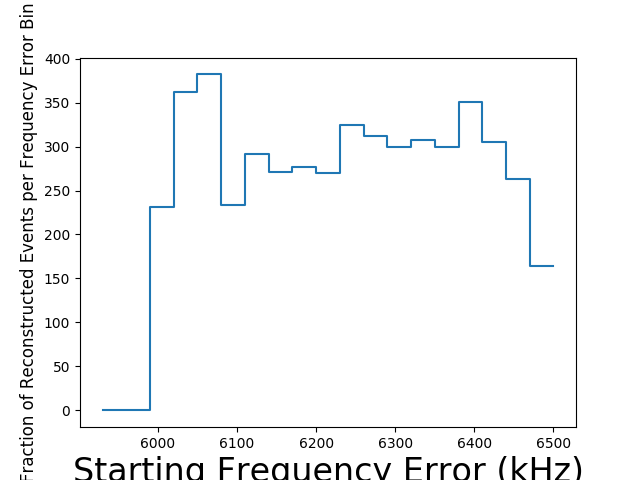

Text(0, 0.5, 'Fraction of Reconstructed Events per Frequency Error Bin')

In [35]:
plt.figure()

freq = []
for i in range(len(freq_mask)-int(len(freq_mask)/2)):
    for each in freq_mask[i]:
        freq.append(delta_frequency_flat[each])
freq = -np.asarray(freq)
h, x = np.histogram(freq, bins = 20, range=(5900, 6500))
plt.step(x[1:], h)

plt.xlabel("Starting Frequency Error (kHz)", fontsize=24)
plt.ylabel("Fraction of Reconstructed Events per Frequency Error Bin", fontsize=12)
#for i in range(int(len(freq_mask)/2)):
 #   for each in freq_mask[i]:
  #      plt.hist(delta_frequency_flat[each], bins=500, density=True, color='r', label='High slopes')
# for i in range(len(freq_mask)-int(len(freq_mask)/2)):
#     for each in freq_mask[i]:
#         plt.hist(delta_frequency_flat[each], bins=500, color='b', label='Low slopes')
